In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math
%matplotlib inline


# "Bridging Chaos and Optimization: Insights from Tacoma Dynamics to TSP Solutions"


## Abstract 

The study explored dynamic behaviors in structural systems and optimization techniques in combinatorial problems using the Tacoma Narrows Bridge model and the Traveling Salesman Problem (TSP). The Tacoma analysis modeled coupled oscillators to investigate resonance and chaotic behaviors under varying initial torsion angles and external forces. Key observations revealed that higher torsion angles and specific wind frequencies induced amplified oscillations, while damping effects stabilized the system. These findings emphasized the importance of parameter control to mitigate resonance and ensure structural stability in large systems.

For the TSP, simulated annealing was employed to minimize travel distances across datasets ranging from 8 to 30 cities. The algorithm effectively optimized paths, achieving shortest distances of 2100–2300 units for 30 cities. Critical factors such as the cooling schedule and initial path randomness significantly influenced convergence toward optimal solutions. Adjustments were proposed to handle constraints, such as avoiding specific regions during adverse weather. Together, these studies demonstrated the versatility of computational methods in solving real-world challenges, from structural stability to logistics optimization.

## Introduction

Optimisation problems have been fundamental to modern science for decades. The rise of computing has revolutionized the methods scientists use to tackle and solve complex challenges. The roots of optimisation trace back to ancient mathematics, where Greek mathematicians like Euclid studied geometric optimisation. These problems are defined by three key elements: variables (what can be adjusted), objective functions (what needs to be maximised or minimised), and constraints (conditions that limit the choices). 

In this report, two main problems were reviewed. The first one was, the Tacoma Bridge problem which involved optimizing the stability of structures by minimising oscillations or stresses under dynamic forces, using tools like Cromer’s method and Taylor’s method to solve the second order differential equations formed by different bridge dynamics for vertical displacement and the torsion angle. this was done by continuous optimisation of the variables 

The second problem considered was The Traveling Salesman Problem (TSP) where the goal was to minimize the total distance travelled by selecting an optimal path through a finite set of cities. the objective of this problem was to Minimize the total travel distance (or cost) of the tour and ensure every city is visited exactly once, with the tour starting and ending at the same city. This was done by discretely optimizing variables to take on distinct and separate values, passing them through a Monte Carlo simulation in which the probability was based on an inverse exponential temperature scaling also known as simulated annealing.


## Problem 1 : The Travelling Salesman

The Traveling Salesman Problem (TSP) is a well-known optimization problem in computational mathematics and operations research. It seeks to determine the shortest possible route that allows a traveler to visit a specified set of cities exactly once before returning to the starting point. Despite its straightforward description, TSP is categorized as an NP-hard problem, presenting significant computational challenges as the number of cities increases. This report investigates the implementation and analysis of different methods to solve the TSP, focusing on exact approaches such as brute force and heuristic methods like simulated annealing. The aim is to compare the performance, efficiency, and accuracy of these algorithms while exploring their broader applications in fields such as logistics, network optimization, and bioinformatics.

### Introduction to Methodology

To study the Traveling Salesman Problem (TSP), a simulated annealing algorithm was employed. A random initial path was generated to visit a set of cities exactly once, forming a closed loop. Pairwise city swaps were used to create new candidate paths, with acceptance determined by a probability function based on temperature and path length changes. An exponential temperature schedule was applied, gradually reducing the likelihood of accepting less optimal paths to avoid local minima.

The algorithm was tested on randomly generated datasets and extended to U.S. capital cities. Parameters such as initial temperature and decay rate were varied to analyze their impact on convergence. Results were evaluated by plotting path length against temperature, with multiple runs conducted to identify the optimal solution and ensure robustness.


### List of US capitals and Map 

The approach was grounded in a realistic scenario using map services and data from the U.S. Geological Survey's National Geospatial Program. A U.S. map was first imported as an image file, and the "capitals.json" file was loaded to create a structured list of U.S. cities. Two primary functions were subsequently defined: one to extract the coordinates of the cities and another to overlay the chosen path onto the U.S. map. This setup facilitated the implementation and testing of the Traveling Salesman Problem (TSP) on a practical example.

In [2]:
#importing map
import json
import copy

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

map = mpimg.imread("map.png")  

# List of 30 US state capitals and corresponding coordinates on the map
with open('capitals.json', 'r') as capitals_file:
    capitals = json.load(capitals_file)
    
    
capitals_list = list(capitals.items())

capitals_list = [(c[0], tuple(c[1])) for c in capitals_list]

print(capitals_list)

#function for showing only the coordinates
def coords(path):
        """Strip the city name from each element of the path list and return
        a list of tuples containing only pairs of xy coordinates for the
        cities. For example,
            [("Atlanta", (585.6, 376.8)), ...] -> [(585.6, 376.8), ...]
        """
        _, coords = zip(*path)
        return coords

#function for the overlay of the path  
def show_path(path_, starting_city, w=35, h=15):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    path=coords(path_) 
    x, y = list(zip(*path))
    
    _, (x0, y0) = starting_city
    
    plt.imshow(map)
    plt.plot(x0, y0, 'y*', markersize=15)  # y* = yellow star for starting point
    plt.plot(x + x[:1], y + y[:1])  # include the starting point at the end of path
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])

[('Oklahoma City', (392.8, 356.4)), ('Montgomery', (559.6, 404.8)), ('Saint Paul', (451.6, 186.0)), ('Trenton', (698.8, 239.6)), ('Salt Lake City', (204.0, 243.2)), ('Columbus', (590.8, 263.2)), ('Austin', (389.2, 448.4)), ('Phoenix', (179.6, 371.2)), ('Hartford', (719.6, 205.2)), ('Baton Rouge', (489.6, 442.0)), ('Salem', (80.0, 139.2)), ('Little Rock', (469.2, 367.2)), ('Richmond', (673.2, 293.6)), ('Jackson', (501.6, 409.6)), ('Des Moines', (447.6, 246.0)), ('Lansing', (563.6, 216.4)), ('Denver', (293.6, 274.0)), ('Boise', (159.6, 182.8)), ('Raleigh', (662.0, 328.8)), ('Atlanta', (585.6, 376.8)), ('Madison', (500.8, 217.6)), ('Indianapolis', (548.0, 272.8)), ('Nashville', (546.4, 336.8)), ('Columbia', (632.4, 364.8)), ('Providence', (735.2, 201.2)), ('Boston', (738.4, 190.8)), ('Tallahassee', (594.8, 434.8)), ('Sacramento', (68.4, 254.0)), ('Albany', (702.0, 193.6)), ('Harrisburg', (670.8, 244.0))]


### Defining the Temperature Schedule

The temperature schedule plays a critical role in the simulated annealing algorithm. It determines how the "temperature," a control parameter, decreases over time to steer the optimization process. At high temperatures, the algorithm readily accepts worse solutions, allowing it to escape local minima. As the temperature lowers, the algorithm becomes more selective, focusing on refining the solution toward optimality.

For this study, an exponential decay schedule(most common type) was utilized, where the temperature at each step was given by:

$$T(t) = \alpha^t T_0$$

With $T_0$ as the initial temperature and $\alpha$ as the decay rate. This gradual decrease in temperature ensured a smooth transition from exploration in the early stages to exploitation of better solutions as the process progressed, enhancing the algorithm's overall efficiency and accuracy. $T_0$ took on a very high value of $10^8$ to allow for extensive exploration of the solution space. $\alpha$ is typically chosen to be close to, but less than 1.0, with common values ranging between 0.95 and 0.99, to ensure a gradual reduction in temperature over time.

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Temperature Decay for Different Alpha Values (Exponential)')

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Temperature (T)')

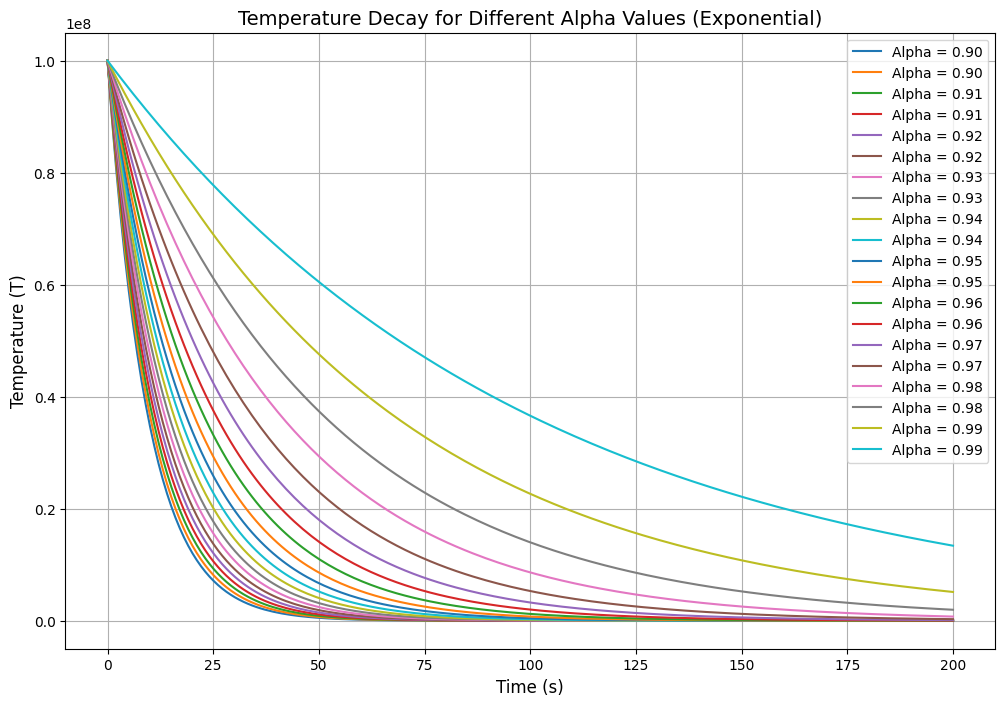

In [3]:
#function for temprature 
def temperature(t, T0=1e8, alpha=0.95):
    return T0 * (alpha ** t)

#parameters
T0 = 1e8
t = np.linspace(0, 200, 200)  #time range from 0 to 200s
alphas = np.linspace(0.9, 0.99, 20)   #alpha range from 0.9 to 0.99

#generate and plot temperature for each alpha
plt.figure(figsize=(12, 8))
for alpha in alphas:
    temperatures = temperature(t, T0, alpha)
    plt.plot(t, temperatures, label=f"Alpha = {alpha:.2f}")

#plot settings
plt.title("Temperature Decay for Different Alpha Values (Exponential)", fontsize=14)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Temperature (T)", fontsize=12)
plt.legend(title="")
plt.grid(True)
plt.show()

### Defining a initial random path

In order to begin simmulated annealing, generating a starting random path is an essential step. The path is represented as a closed loop that visits each city in a given list exactly once and returns to the starting city. Like in the capitals_list, each city is defined by a tuple containing its name and geographic coordinates $(x,y)$. The sequence of cities in the path determines the order in which they are visited, with the last city connecting back to the first.

A function was implemented to randomly sample a subset of cities, connect them into a path, and ensure the loop is closed by appending the starting city at the end. Initialy it is only done for 8 cities

In [4]:
#function for generating a random path
def generate_random_path(cities, num_cities=8):
    ro=random.sample(cities, num_cities)
    
    #looping the path
    ro.append(ro[0])
    return ro

#calling the capital list and making a random path from it
og_list = capitals_list

#example usage
random_path = generate_random_path(og_list,8)
print("Random starting path:", random_path)

Random starting path: [('Columbus', (590.8, 263.2)), ('Boston', (738.4, 190.8)), ('Austin', (389.2, 448.4)), ('Boise', (159.6, 182.8)), ('Columbia', (632.4, 364.8)), ('Little Rock', (469.2, 367.2)), ('Richmond', (673.2, 293.6)), ('Jackson', (501.6, 409.6)), ('Columbus', (590.8, 263.2))]


This approach ensures a valid initial path that adheres to the problem constraints and serves as the baseline for proceeding further. 

### Pair-wise exchange

Pairwise exchange is a operation used to modify a given path by swapping the positions of two cities. This is crucial for the simulated annealing algorithm, as it allows exploration of new candidate solutions by altering the sequence of cities in the path.

The pair_ex function performs a pairwise exchange of two cities in a given TSP path to generate a new candidate solution. It starts by creating a copy of the input path, excluding the last city(de-looping the path), to ensure modifications do not affect the original data. Two random indices are selected, and the cities at these indices are swapped. To maintain the closed-loop structure of the TSP, the first city is appended back to the end of the modified path. The function returns this new path, which serves as a slight variation of the original.

In [5]:
#function for pairwise exchange
def pair_ex(random_path):
    
    #creates a de-looped copy of the original list
    new_path = random_path[:-1].copy()

    #takes two random cities from the list and swap them
    i, j = random.sample(range(len(new_path)), 2)
    new_path[i], new_path[j] = new_path[j], new_path[i]

    new_path.append(new_path[0]) #re-loops the path
    return new_path

#example usage
n_random_path=pair_ex(random_path)
print(n_random_path)

[('Columbus', (590.8, 263.2)), ('Boston', (738.4, 190.8)), ('Austin', (389.2, 448.4)), ('Boise', (159.6, 182.8)), ('Columbia', (632.4, 364.8)), ('Jackson', (501.6, 409.6)), ('Richmond', (673.2, 293.6)), ('Little Rock', (469.2, 367.2)), ('Columbus', (590.8, 263.2))]


As seen clearly the provided list had two random cities swapped and then re-looped according to the new list

### Calculating Path length

To proceed, a function was implemented to compute the total length of a circular path called calculate_total_length. This was done by inputing a list of coordinates representing the cities in the path. The total length was initialized to zero, and the Euclidean distance between each pair of consecutive cities was calculated and added to the total. To account for the circular nature of the problem, the first city's coordinates were appended to the end of the path to ensure the last city connected back to the first. The resulting total length of the path was then returned as the output.

In [6]:
#convert the current path into their respective coordinates
coo_path = coords(n_random_path)

#function to calculate the total length of a circular path
def calculate_total_length(coo_path):
    
    total_length = 0  #initialize total length
    
    for i in range(len(coo_path) - 1):
        
        #extract coordinates of consecutive cities
        x1, y1 = coo_path[i]
        x2, y2 = coo_path[i + 1]
        
        #calculate Euclidean distance and update total length
        distance = ((x2 - x1)**2 + (y2 - y1)**2)**0.5
        total_length += distance
    return total_length  #return total length of the path

#calculate and print the total length of the path
length = calculate_total_length(coo_path)
print("Total length of the closed path:", length)

Total length of the closed path: 2178.305124154991


### Simulated annealing for 8 cities

Using the Simulated Annealing algorithm, the goal was to minimize the total distance traveled by a salesman visiting a set of cities in a closed loop. The process was controlled by a temperature parameter, which gradually decreased over iterations to balance exploration and exploitation.

In the code, the simulated_annealing function was defined to execute the optimization process. The function started with an initial path and computed its total distance. A temperature schedule was applied, reducing the temperature over a fixed number of iterations using an exponential decay factor $\alpha$. At each step, a new path was generated by swapping two cities, and the new path's distance was calculated. The acceptance of this new path was determined probabilistically using the formula:

$$ P = e^{ - \left( d_{new} - d_{old}  \right) / T } $$

where $T$ was the current temperature. If accepted, the current path was updated; otherwise, the original path was retained. The best path and its corresponding distance were tracked throughout the process.

Finally, the function returned the best path, its length, and the distances recorded at each temperature. Results were plotted using log-log scales to visualize the relationship between temperature and the accepted distances. Multiple parameter settings for $\alpha$ and $T_0$ were tested to observe the algorithm's behaviour and performance.

Best Overall Distance: 1324.8015980470823
Best Overall Path: [('Boise', (159.6, 182.8)), ('Oklahoma City', (392.8, 356.4)), ('Raleigh', (662.0, 328.8)), ('Richmond', (673.2, 293.6)), ('Harrisburg', (670.8, 244.0)), ('Hartford', (719.6, 205.2)), ('Boston', (738.4, 190.8)), ('Des Moines', (447.6, 246.0)), ('Boise', (159.6, 182.8))]


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'temperatures')

Text(0, 0.5, 'Distance')

Text(0.5, 1.0, 'Accepted Distances vs temperatures in Simulated Annealing')

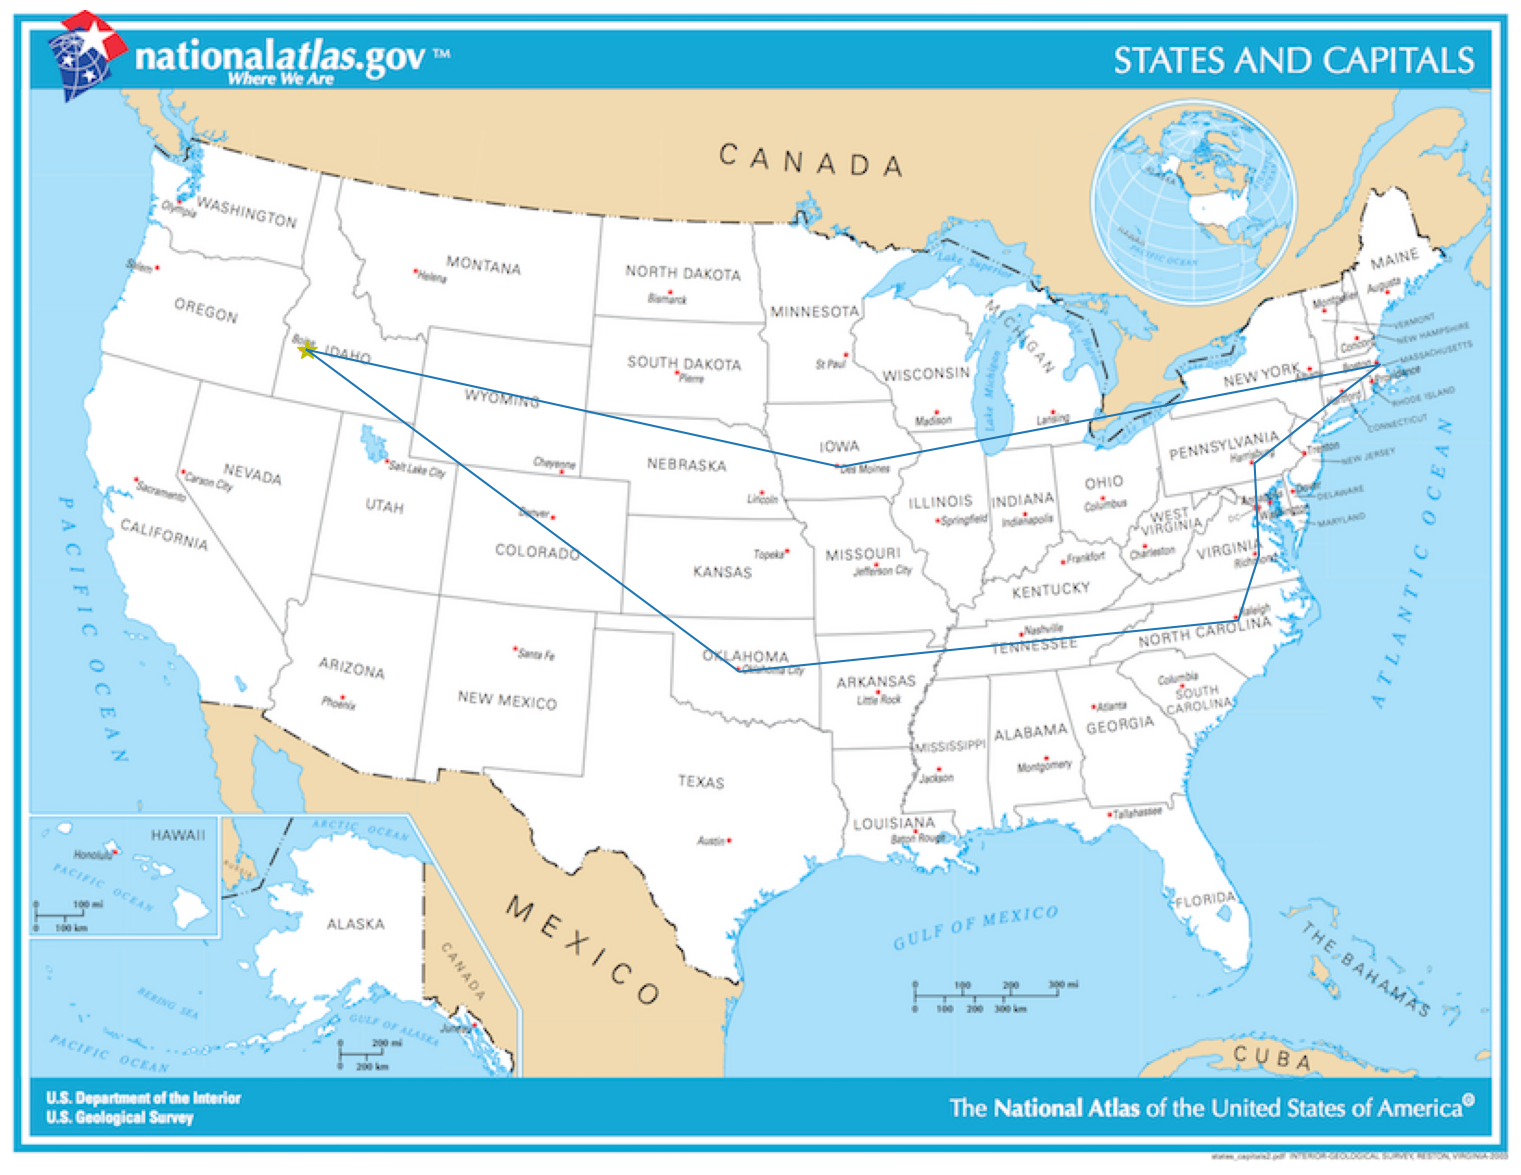

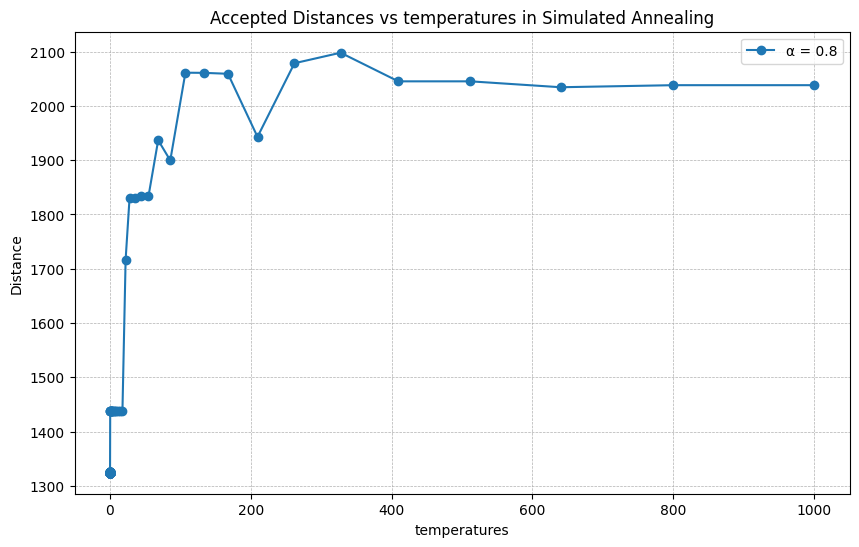

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'temperatures')

Text(0, 0.5, 'Distance')

Text(0.5, 1.0, 'Accepted Distances vs temperatures in Simulated Annealing')

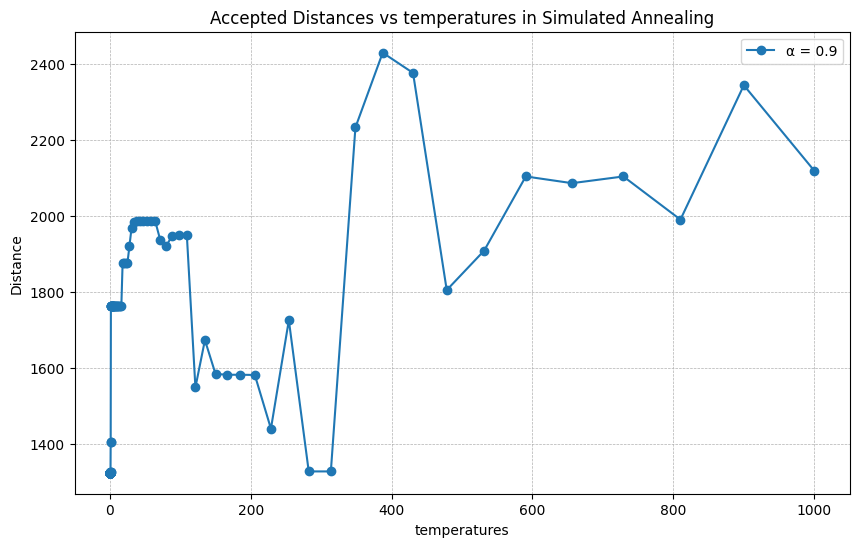

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'temperatures')

Text(0, 0.5, 'Distance')

Text(0.5, 1.0, 'Accepted Distances vs temperatures in Simulated Annealing')

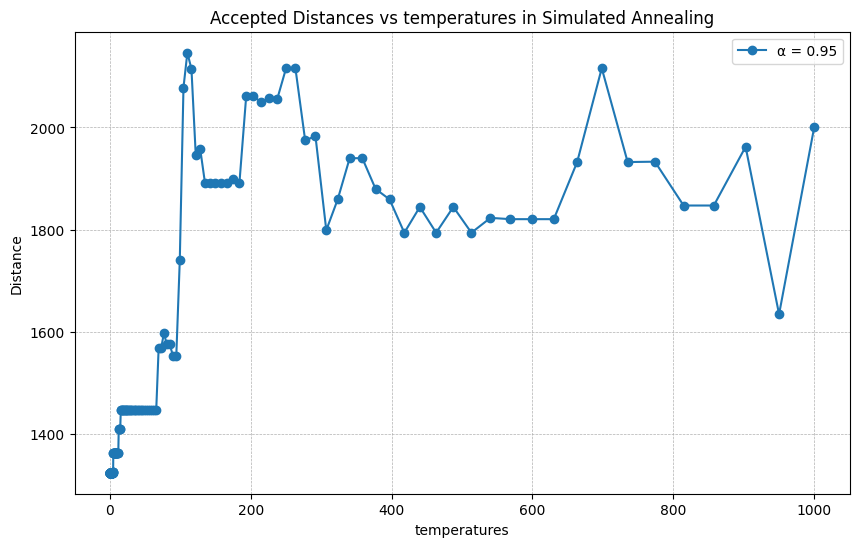

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'temperatures')

Text(0, 0.5, 'Distance')

Text(0.5, 1.0, 'Accepted Distances vs temperatures in Simulated Annealing')

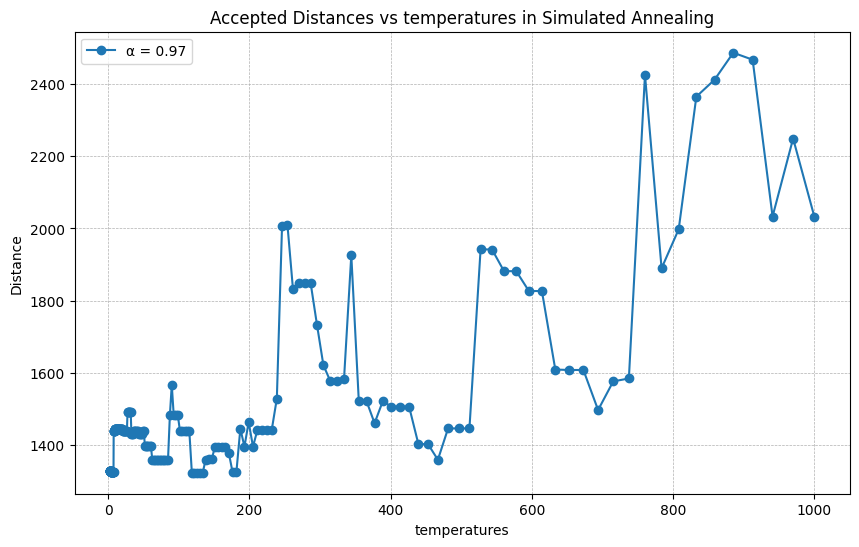

In [7]:
#function for simulated annealing
def simulated_annealing(initial_path, T0=1000, alpha=0.97, max_steps=200,n=1):

    #making lists for the initial contitions
    current_path = initial_path
    d_old = calculate_total_length(coords(current_path))
    best_path = current_path
    best_length = d_old

    distances = []  #to store distances for plotting
    temperatures = []  #to store temperatures for plotting

    for i in range(0,n):
        for step in range(max_steps):
            T = max(temperature(step, T0, alpha), 1e-15)
            temperatures.append(T)

            # Perform a pairwise exchange
            new_path = pair_ex(current_path)
            d_new = calculate_total_length(coords(new_path))

            # Calculate acceptance probability
            
            if d_new < d_old or random.random() < math.exp((d_old - d_new) / T):
                current_path = new_path
                d_old = d_new

            # Update the best path
            if d_old < best_length:
                best_path = current_path
                best_length = d_old

            distances.append(d_old)

    return best_path, best_length, distances, temperatures


#defining the initial conditions
first_path=generate_random_path(og_list,8)
T0 = 1000
max_steps = 200
alphas = [0.8,0.9,0.95,0.97]

#empty list for storing results
results = []

#number of times the iterated algorithm runs
for u in range(1):
    best_path, best_length, distances, temperatures = simulated_annealing( first_path, T0, alpha, max_steps,1)
    results.append((best_length, best_path))

results.sort(key=lambda x: x[0])  #sort by distance
best_overall_distance, best_overall_path = results[0]

#print results
print(f"Best Overall Distance: {best_overall_distance}")
print(f"Best Overall Path: {best_overall_path}")
show_path(best_overall_path,best_overall_path[0])

for alpha in alphas:
    best_path, best_length, distances, temperatures = simulated_annealing( first_path, T0, alpha, max_steps,1)
    plt.figure(figsize=(10, 6))
    plt.plot(temperatures, distances, marker='o', linestyle='-', label=f"\u03B1 = {alpha}")
    plt.xlabel("temperatures")
    plt.ylabel("Distance")
    plt.title("Accepted Distances vs temperatures in Simulated Annealing")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

This returned the optimal or near-optimal path for a random selection of 8 cities. The randomness in selecting 8 cities significantly impacts the results of the simulated annealing algorithm. Since the cities are chosen randomly, the initial configuration of the path may vary greatly in terms of total distance and spatial distribution, leading to different optimization challenges for each run. This randomness introduces variability in the outcomes, including the best path and total distance obtained during each run of the algorithm.

The graph illustrates the relationship between temperature and the accepted distances during the simulated annealing process for solving the Traveling Salesman Problem (TSP). The x-axis represents the temperature on a linear scale, while the y-axis shows the corresponding distances for the accepted paths. Initially, at higher temperatures, the algorithm frequently accepts paths with higher distances, facilitating exploration of the solution space. This is done during the early stages to avoid local minima. As the temperature decreases, the algorithm becomes more selective, gradually favoring shorter paths and converging toward an optimal or near-optimal solution. 

### Simulated annealing for 20 cities

Similarly, as done above, same algorithm was implemented but not for 20 cities and the algorithm was also iterated 5 times to ensure the fluctuation caused go back to 0. The $T_0$ was also decreased from 1000 to a 100 to make sure that only the shorter paths get picked out of the list 

Best Overall Distance: 2338.3190003079935
Best Overall Path: [('Harrisburg', (670.8, 244.0)), ('Albany', (702.0, 193.6)), ('Providence', (735.2, 201.2)), ('Trenton', (698.8, 239.6)), ('Atlanta', (585.6, 376.8)), ('Baton Rouge', (489.6, 442.0)), ('Little Rock', (469.2, 367.2)), ('Oklahoma City', (392.8, 356.4)), ('Des Moines', (447.6, 246.0)), ('Saint Paul', (451.6, 186.0)), ('Salem', (80.0, 139.2)), ('Boise', (159.6, 182.8)), ('Salt Lake City', (204.0, 243.2)), ('Phoenix', (179.6, 371.2)), ('Austin', (389.2, 448.4)), ('Tallahassee', (594.8, 434.8)), ('Columbia', (632.4, 364.8)), ('Indianapolis', (548.0, 272.8)), ('Madison', (500.8, 217.6)), ('Columbus', (590.8, 263.2)), ('Harrisburg', (670.8, 244.0))]


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'iterations')

Text(0, 0.5, 'Distance')

Text(0.5, 1.0, 'Accepted Distances vs iterations in Simulated Annealing')

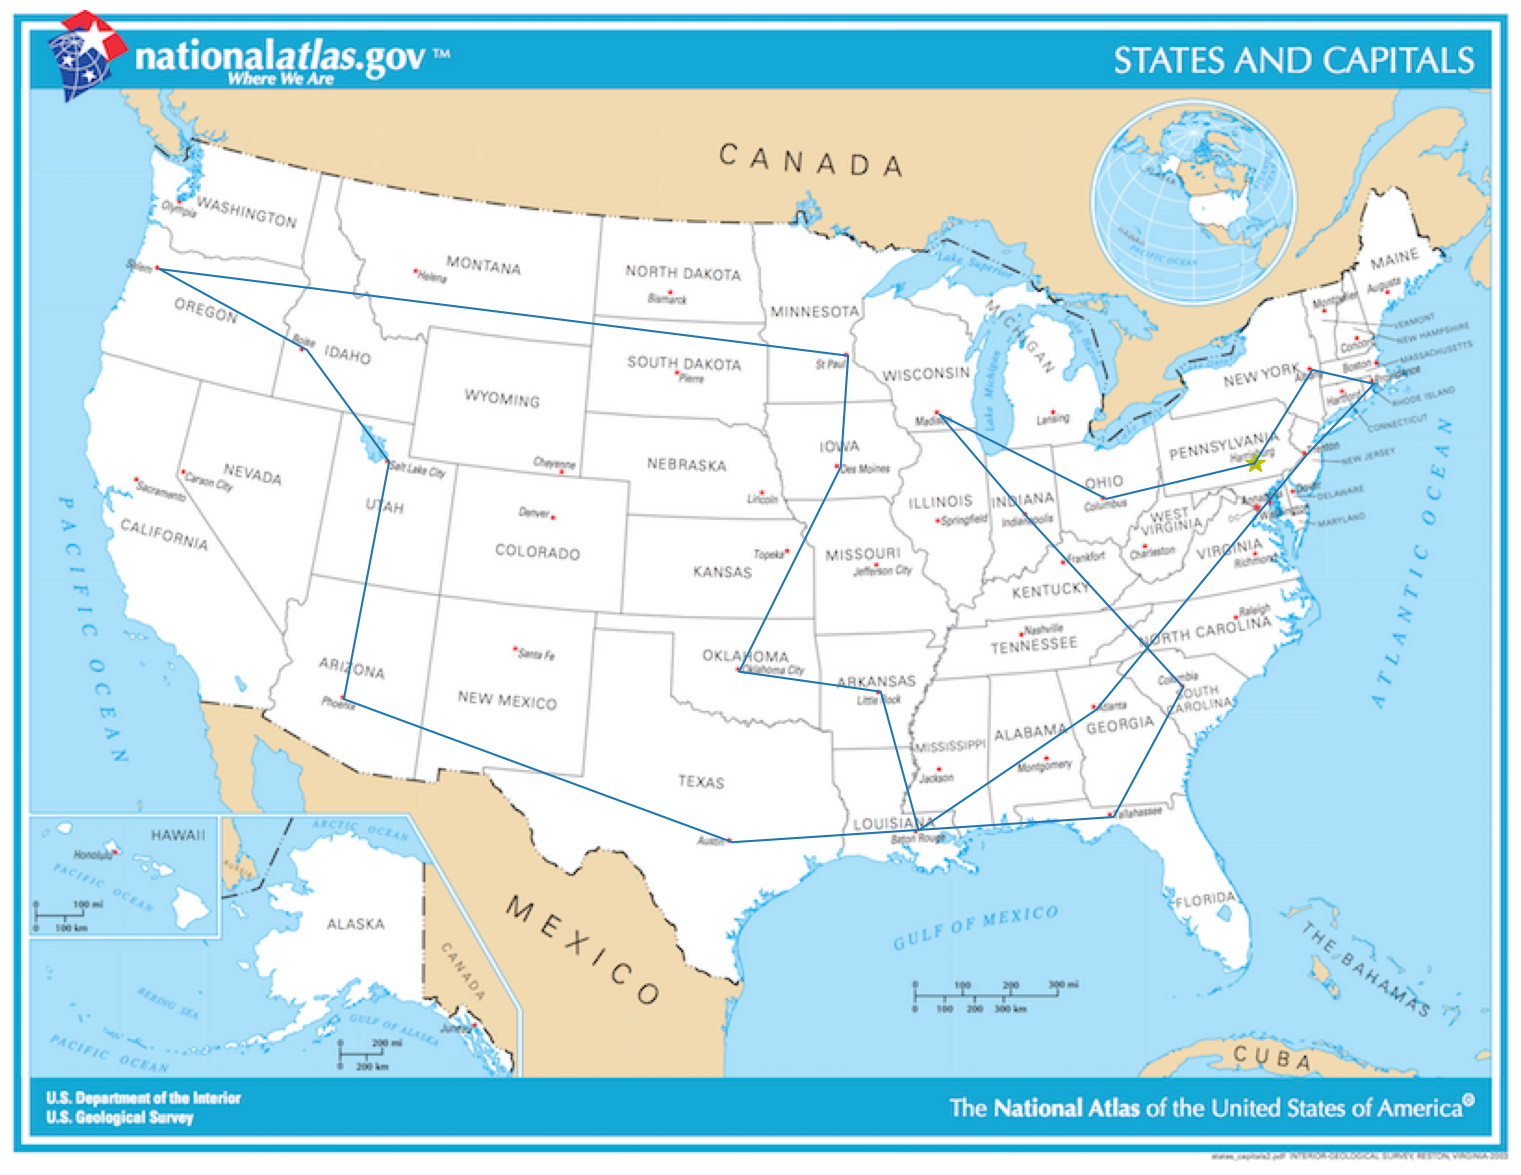

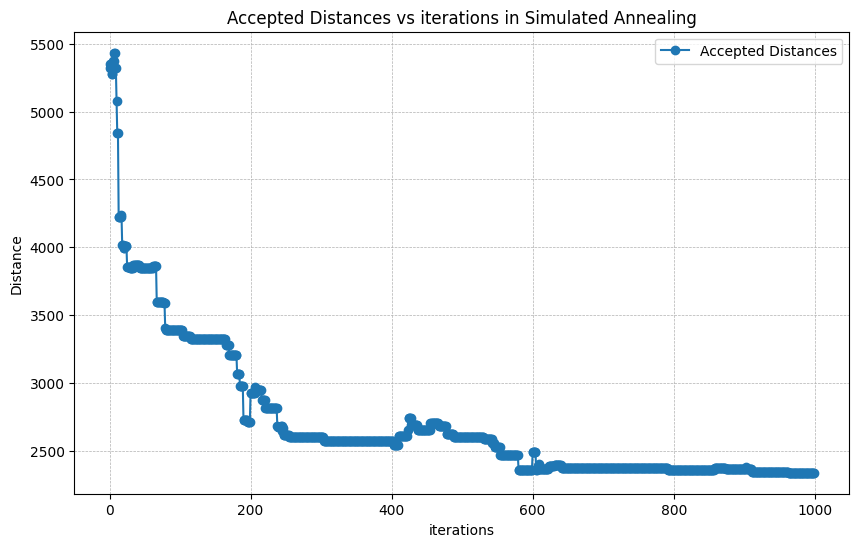

In [8]:
#defining the initial conditions
first_path=generate_random_path(og_list,20)
T0 = 100
max_steps = 200
alphas = 0.97

#empty list for storing results
results = []

#number of times the iterated algorithm runs
for u in range(1):
    best_path, best_length, distances, temperatures = simulated_annealing( first_path, T0, alpha, max_steps,5)
    results.append((best_length, best_path))

results.sort(key=lambda x: x[0])  #sort by distance
best_overall_distance, best_overall_path = results[0]

#plot results
print(f"Best Overall Distance: {best_overall_distance}")
print(f"Best Overall Path: {best_overall_path}")
show_path(best_overall_path,best_overall_path[0])

plt.figure(figsize=(10, 6))
plt.plot(range(len(distances)), distances, marker='o', linestyle='-', label="Accepted Distances")
plt.xlabel("iterations")
plt.ylabel("Distance")
plt.title("Accepted Distances vs iterations in Simulated Annealing")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

The graph illustrates the progression of accepted distances over iterations in the simulated annealing process for a TSP involving 20 cities. The x-axis represents the iterations, and the y-axis shows the distances of the accepted paths. Initially, the algorithm accepted paths with higher distances, allowing for extensive exploration of the solution space. As the iterations progressed and the temperature decreased, the algorithm became more selective, favoring shorter distances while still occasionally accepting longer paths to avoid local minima.

The observed trend shows a significant drop in the path distance during the early iterations, reflecting the rapid improvement in solution quality as the algorithm explored and refined the path. Beyond approximately 400 iterations, the distances stabilized with minor fluctuations, indicating convergence toward an optimal or near-optimal solution.

### Simulated annealing for 30 cities

The algorithm, in this part, runs for all 30 cities and this was also iterated 1500 times. This was defined as 1 run. 20 such runs were performed to provide an optimal or near-optimal distance

Best Overall Distance: 2166.1106578555955
Best Overall Path: [('Des Moines', (447.6, 246.0)), ('Saint Paul', (451.6, 186.0)), ('Madison', (500.8, 217.6)), ('Lansing', (563.6, 216.4)), ('Indianapolis', (548.0, 272.8)), ('Columbus', (590.8, 263.2)), ('Harrisburg', (670.8, 244.0)), ('Albany', (702.0, 193.6)), ('Boston', (738.4, 190.8)), ('Providence', (735.2, 201.2)), ('Hartford', (719.6, 205.2)), ('Trenton', (698.8, 239.6)), ('Richmond', (673.2, 293.6)), ('Raleigh', (662.0, 328.8)), ('Columbia', (632.4, 364.8)), ('Atlanta', (585.6, 376.8)), ('Tallahassee', (594.8, 434.8)), ('Montgomery', (559.6, 404.8)), ('Nashville', (546.4, 336.8)), ('Little Rock', (469.2, 367.2)), ('Jackson', (501.6, 409.6)), ('Baton Rouge', (489.6, 442.0)), ('Austin', (389.2, 448.4)), ('Oklahoma City', (392.8, 356.4)), ('Phoenix', (179.6, 371.2)), ('Sacramento', (68.4, 254.0)), ('Salem', (80.0, 139.2)), ('Boise', (159.6, 182.8)), ('Salt Lake City', (204.0, 243.2)), ('Denver', (293.6, 274.0)), ('Des Moines', (447.6, 2

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'runs')

Text(0, 0.5, 'best Distance')

Text(0.5, 1.0, 'bet distances vs runs in Simulated Annealing')

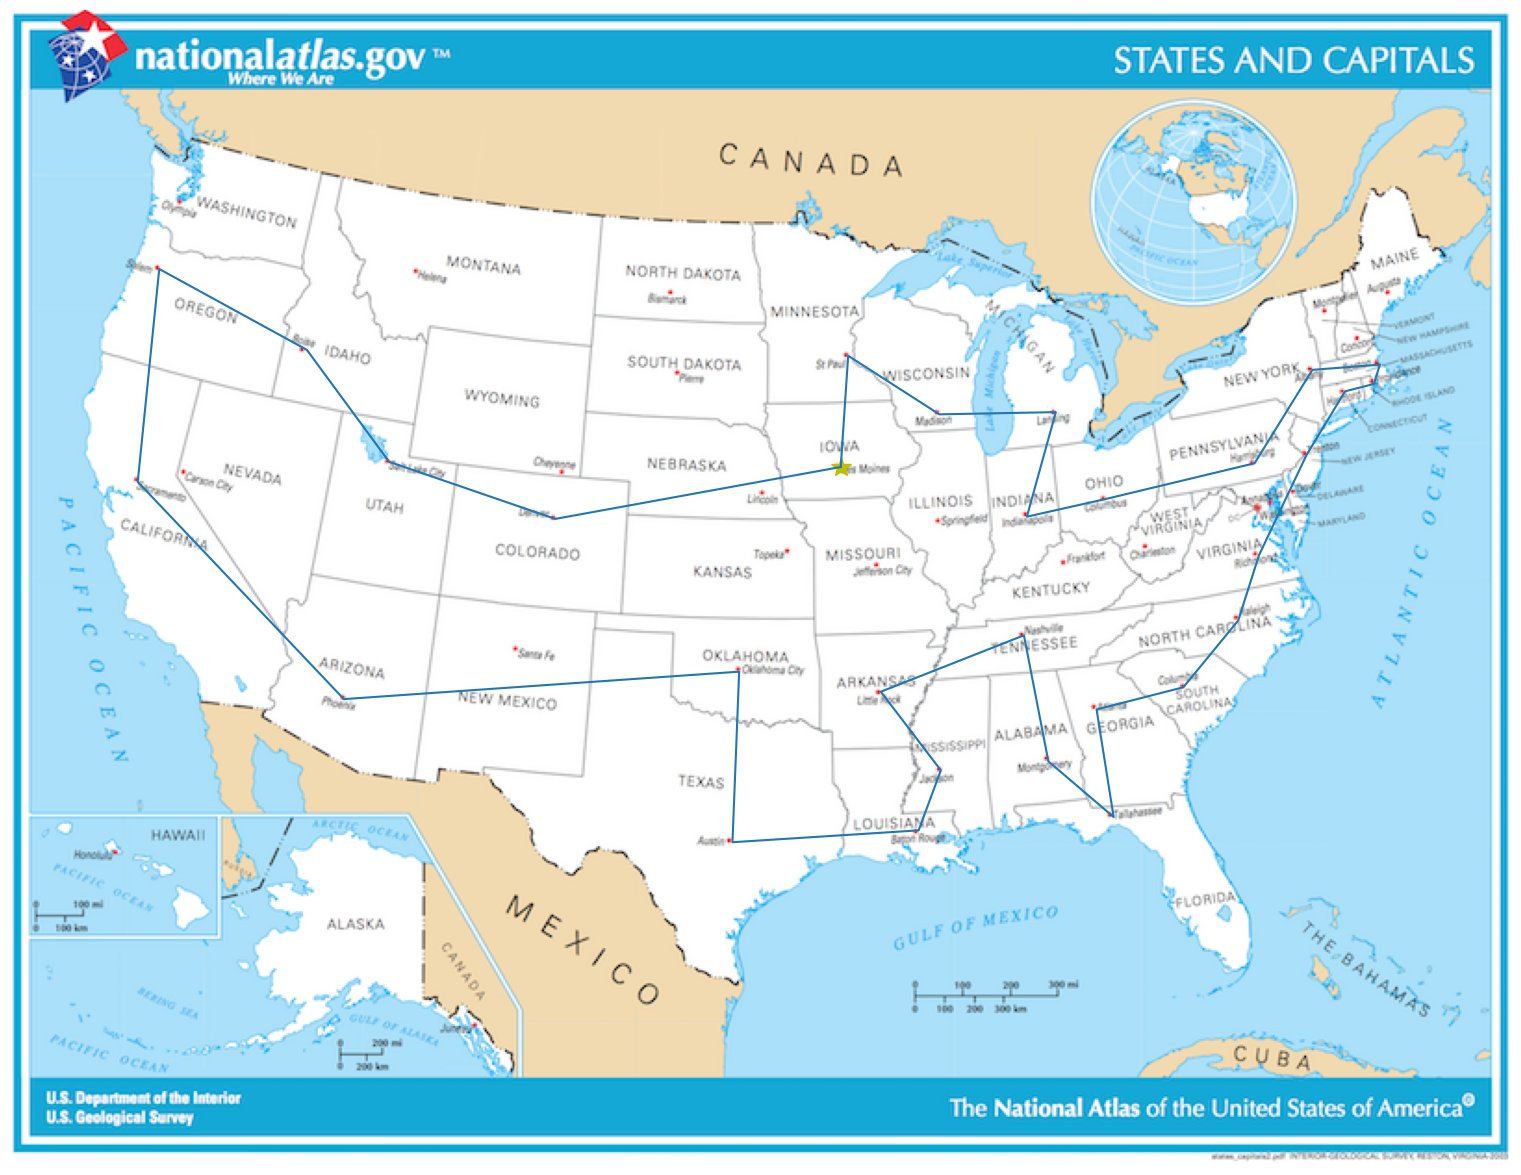

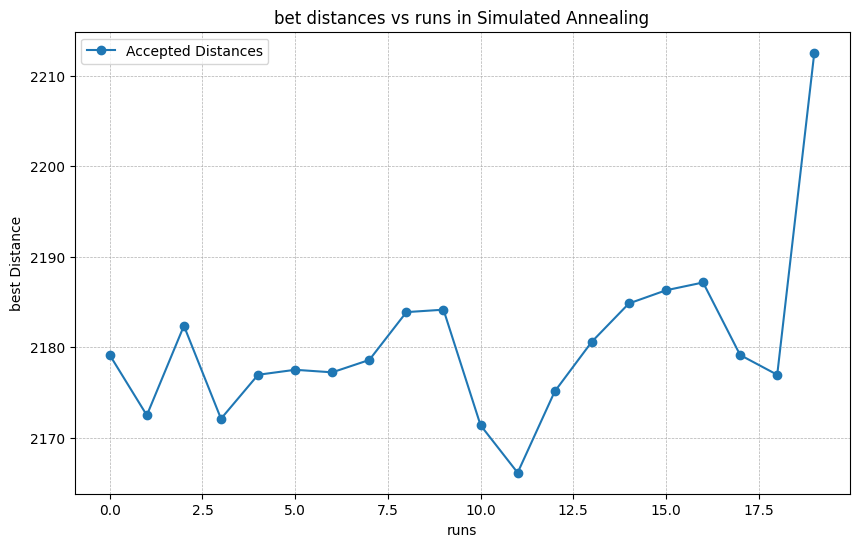

In [9]:
#defining the initial conditions
first_path=generate_random_path(og_list,30)
T0 = 100
max_steps = 200
alphas = 0.97

#empty list for storing results
results = []
best_dis_everyrun=[]

#number of times the iterated algorithm runs
for u in range(20):
    best_path, best_length, distances, temperatures = simulated_annealing( first_path, T0, alpha, max_steps,1500)
    best_dis_everyrun.append(min(distances))
    results.append((best_length, best_path))

results.sort(key=lambda x: x[0])  #sort by distance
best_overall_distance, best_overall_path = results[0]

#plot results
print(f"Best Overall Distance: {best_overall_distance}")
print(f"Best Overall Path: {best_overall_path}")
show_path(best_overall_path,best_overall_path[0])

plt.figure(figsize=(10, 6))
plt.plot(range(len(best_dis_everyrun)), best_dis_everyrun, marker='o', linestyle='-', label="Accepted Distances")
plt.xlabel("runs")
plt.ylabel("best Distance")
plt.title("bet distances vs runs in Simulated Annealing")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


The graph represents the best distances obtained during each of the 20 runs of the simulated annealing algorithm for a TSP involving 30 cities. The x-axis shows the run number, while the y-axis indicates the best distance achieved in each run. Each run consisted of 1500 iterations, and the algorithm aimed to identify an optimal or near-optimal path by minimizing the total distance traveled.

The observed fluctuations in the best distances across different runs reflect the probabilistic nature of the simulated annealing algorithm and its sensitivity to the initial random path. Some runs converged to shorter paths, while others yielded slightly longer paths. These variations highlight the impact of randomness in the algorithm and emphasize the need for multiple runs to identify the most efficient solution reliably. Overall, the graph demonstrates the algorithm's ability to consistently produce competitive solutions while accounting for the inherent variability in the optimization process.

The obtained optimal solution varied in the range of 2100 - 2300

### Discussion

The simulated annealing algorithm was successfully implemented to solve the Traveling Salesman Problem (TSP) for varying city sizes. The optimization process demonstrated its effectiveness in minimizing the total distance traveled in a closed loop while balancing exploration and exploitation through probabilistic acceptance of solutions. The initial experiments with 8 cities provided a clear understanding of the algorithm’s behavior, where distances steadily decreased as the temperature lowered, and the algorithm converged toward an optimal solution. Extending the approach to 20 and 30 cities, the algorithm maintained its ability to identify competitive solutions, despite increased complexity due to the larger solution space.

In the case of 30 cities, 20 independent runs of the algorithm were conducted, with each run involving 1500 iterations. The obtained optimal solutions varied in the range of 2100 to 2300 units, reflecting the inherent randomness in the initial path and the probabilistic nature of the optimization process. The variations across runs highlighted the importance of multiple iterations to ensure a reliable estimate of the optimal or near-optimal solution. The algorithm’s ability to produce consistently competitive results across different scales of the problem underscored its robustness and adaptability.

Overall, the results validated simulated annealing as a powerful optimization technique for the TSP, capable of handling both small and large datasets effectively. The algorithm’s reliance on probabilistic acceptance, temperature scheduling, and iterative refinement ensured efficient exploration of the solution space while avoiding local minima. The observed convergence trends and solution quality demonstrated the applicability of simulated annealing in solving complex combinatorial optimization problems with real-world significance.

The cooling procedure and temperature schedule were critical to the success of minimization. A gradual temperature decrease allowed sufficient exploration in the early stages by accepting worse solutions and gradually refined the path as the temperature lowered. A poorly designed cooling schedule could result in premature convergence or unnecessary computational expense.

To extend the optimisation capability of the code a longest path instead of the shortest path could have been found. To do this, the objective function of the simulated annealing algorithm would need to be modified to maximize the total distance traveled. This could be achieved by minimizing the negative distance, thereby reversing the optimization goal while maintaining the same structure and probabilistic acceptance formula.

To avoid transverse routes across central states during winter, a penalty-based approach could be added to the objective function. Paths crossing snow-prone areas could incur higher penalties, effectively increasing their cost. This would guide the algorithm to prioritize alternative routes while maintaining the optimization process's efficiency.

Simulated annealing is also widely used in protein folding, where it identifies the lowest-energy conformations (Dill & MacCallum, 2012), and in VLSI chip design to optimize component placement (Kirkpatrick et al., 1983). These examples highlight its versatility for solving complex scientific problems.

## Problem 2: The Tacoma Bridge

The Tacoma Narrows Bridge problem is a classical physics-based simulation challenge that investigates the dynamic behavior of oscillatory systems under external forces. The collapse of the bridge in 1940, caused by aeroelastic flutter, serves as a key example of resonance and instability in structural systems. This report aims to study the behavior of the bridge model under varying initial conditions, external forces, and driving frequencies. By simulating the bridge as a system of coupled oscillators, the goal is to analyze how changes in these parameters influence the system’s stability and response, providing insights into the mechanisms that lead to resonance and chaotic dynamics.

### Introduction to the Methodology

This problem involved solving two second order differential equation, one for the vertical acceleration and the other for the angular acceleration. They are as follows:

$$ y'' = -d \times y' - \frac{K}{M a} \left( e^{a \left( y - l \sin(\theta) \right)} - 1 + e^{a \left( y + l \sin(\theta) \right)} - 1 \right) $$

$$ \theta'' = -d \times \theta' + \frac{3 \cos(\theta)}{l} \frac{K}{M a} \left( e^{a \left( y - l \sin(\theta) \right)} - e^{a \left( y + l \sin(\theta) \right)} \right) $$

The solution for these yielded the results for vertical displacement (y) and the torsion angle ($\theta$). The behavior of these results was studied for different situation by variation of different parameter and also by introducing a wind force which caused variations in the vertical acceleration. 

### Defining the model

To obtain results for y and $\theta$, first a model was defined that solved the given differential equations. For this, first the required modules were loaded and any variables that were fixed throughout the process were defined 



In [10]:
#fixed parameters that do not change throughout the process
t_initial=0
t_final=100
d=0.01
a=1
M=2500
K=10000
l=6
dt=0.01    #time step

After this, a function, for calling the model, was defined. This began with defining some variables which included empty lists to store the results and an array of times according to the time step. This was followed by defining some initial conditions.

Subsequently, a for loop was formed which integrated the system of equations over time. The first equation defined was that of the vertical acceleration followed by that of the angular acceleration. Implementing both the explicit approach (using Taylor's method), which provided the solutions for vertical and angular velocities respectively, and the semi-implicit approach (using Cromer's modification), an array of solutions was obtained for the vertical and angular displacement. 


In [11]:

#function for defining the model
def tacoma_nowind(dt=0.01, cromer=True, t_final=100, y0=0.1, theta0=0.1, ydash0=0, thetadash0=0, d=0.1, K=1, M=1, l=1, a=1):
    
    times=np.arange(t_initial, t_final+dt, dt) #array of model times
   
    Nt=len(times) #number of time-steps
    
    #empty variables to store the results created according to the number of time-steps
    y = np.zeros(Nt)
    theta = np.zeros(Nt)
    thetadash = np.zeros(Nt)
    ydash = np.zeros(Nt)
    
    #initial conditions
    y[0] = y0
    ydash[0] = ydash0
    theta[0] = theta0
    thetadash[0]=thetadash0
    
    #loop over all of the time-steps and integrate the equations simultaniously
    for n in range(Nt-1):
        
        #angular acceleration equation
        theta2dash=-d * thetadash[n] + (3 * np.cos(theta[n])) * (K / (M*l*a))*((np.exp(a * (y[n] - 1 * np.sin(theta[n])))) - (np.exp(a * (y[n] + 1 * np.sin(theta[n])))))
        
        #vertical acceleration equation
        y2dash=-d * ydash[n] - (K / (M * a)) * ((np.exp(a * (y[n] - 1 * np.sin(theta[n])))) - 1 + (np.exp(a * (y[n] + 1 * np.sin(theta[n])))) - 1)
        
        #Taylor's method for time-steping vertical and angular velocities
        ydash[n+1]=ydash[n] + dt * y2dash
        thetadash[n+1]=thetadash[n] + dt * theta2dash
        
        #time-step the angle and vertical displacement.
        if cromer: #if we are using 'Taylor' or 'Cromer"
            y[n+1] = y[n] + dt * ydash[n+1]
            theta[n+1] = theta[n] + dt * thetadash[n+1]
        else:
            y[n+1] = y[n] + dt * ydash[n]
            theta[n+1] = theta[n] + dt * thetadash[n]
        
    #return the values of no of time-steps used, angle, vertical displacement, vertical and angular velocities
    return times, theta, y, ydash, thetadash

### Solving the Differential Equation (no wind force)

Since the model for solving the differential equations has already been defined, the equations were solved by calling the function and defining the initial values of vertical displacement and torsion angle for the function to initialize the process. For vertical displacement the initial condition use was $y_0(t=0)=0.1$ and multiple initial value were used for the torsion angle. This was done to understand the behaviour of vertical displacement when the torsion angle change. The values used where $\theta_0(t=0) = 0.1, 0.01, 0$ respectively. Both methods, Taylor’s and Cromer’s, were implemented to compare their efficiencies. The first one used was Cromer’s modification 


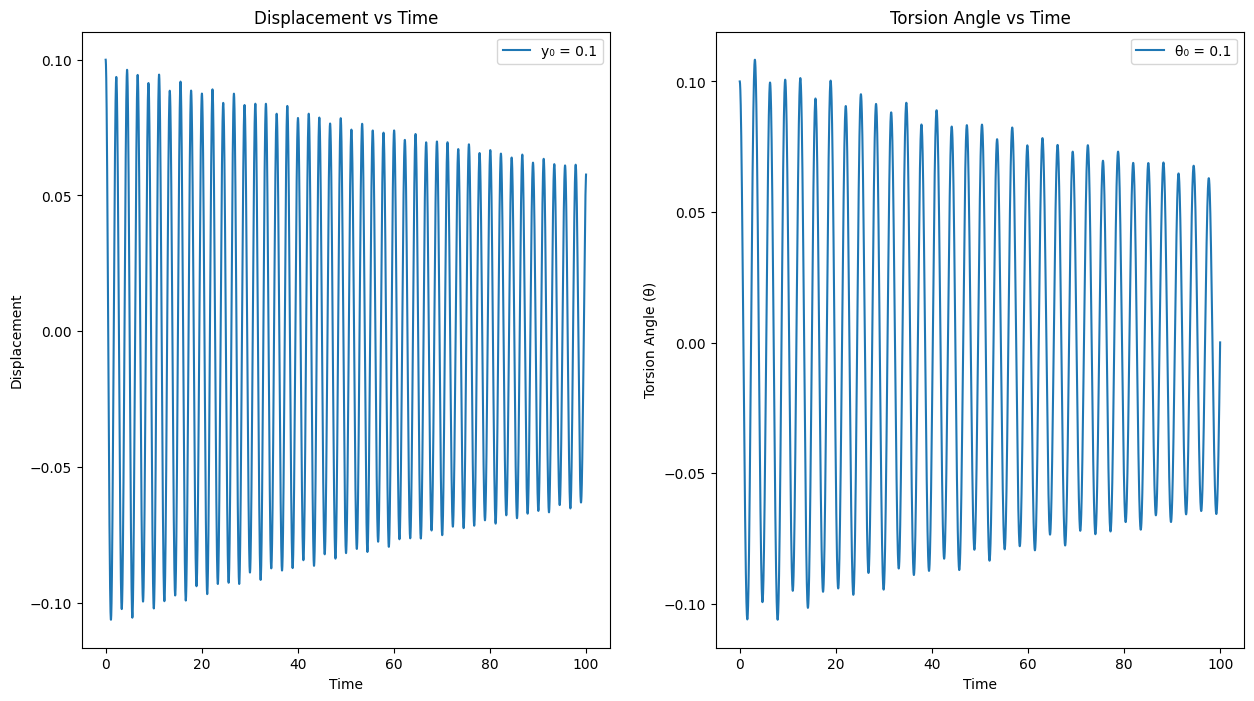

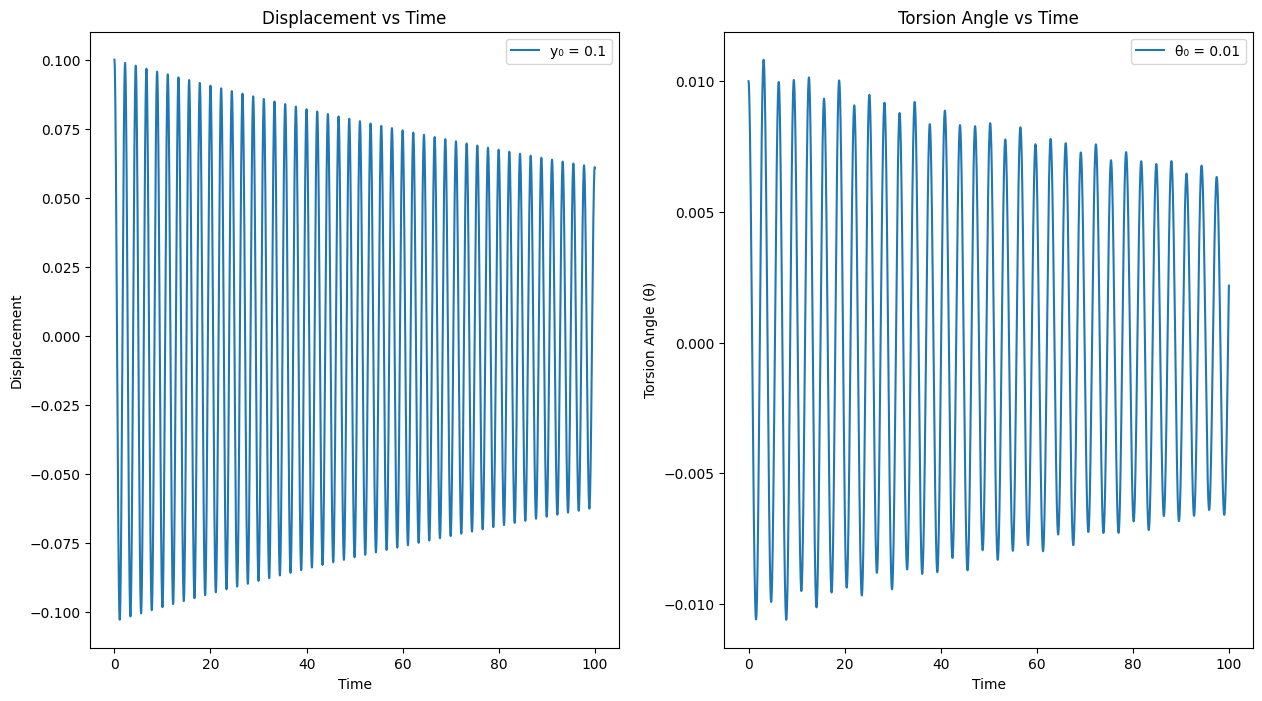

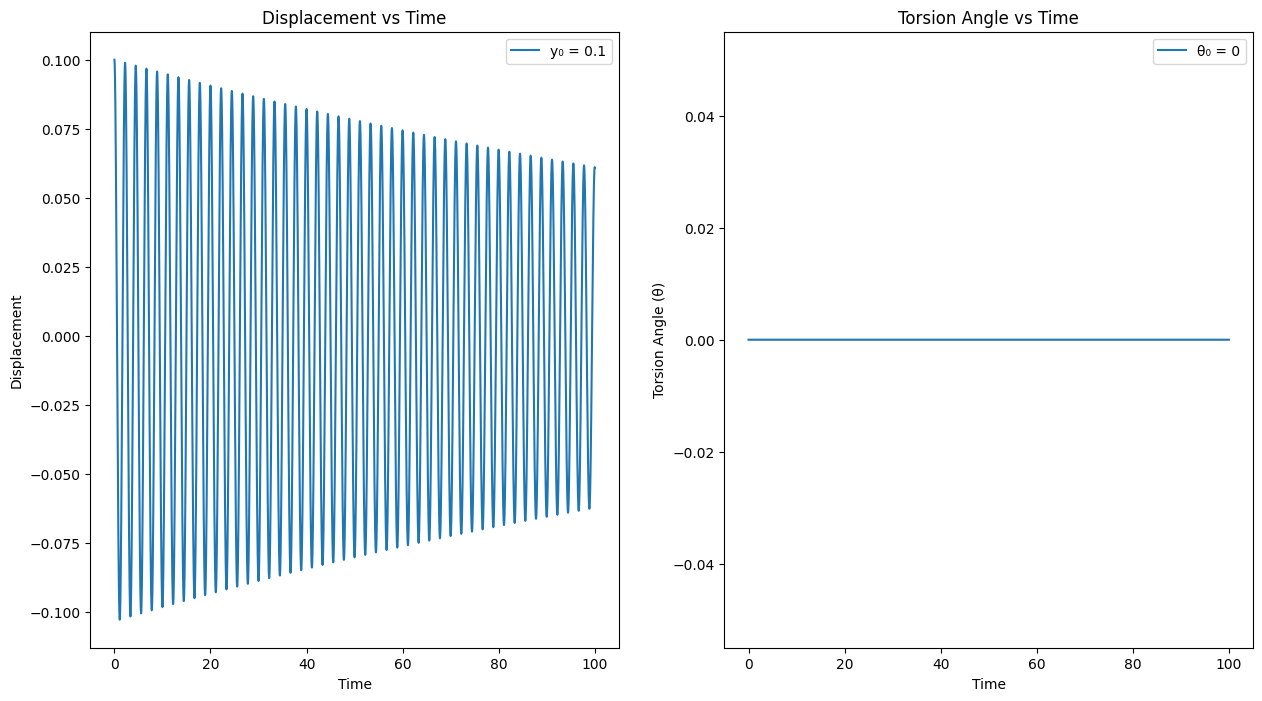

In [12]:
#defining a function for ploting the graphs 
def plot_nowind():

    #list of the initial torsion angles
    torsion_angles = [0.1, 0.01, 0]

    #loop for running the model for all values of initial torsion angle
    for theta0 in torsion_angles:
        times, theta, y, _, _ = tacoma_nowind(theta0=theta0, y0=0.1, ydash0=0, thetadash0=0, d=d, K=K, M=M, l=l, a=a)
    
        plt.figure(figsize=(15,8))

        #time graphs for vertical displacement 
        plt.subplot(1, 2, 1)
        plt.plot(times, y, label=f"y\u2080 = {0.1}")
        plt.xlabel("Time")
        plt.ylabel("Displacement")
        plt.title("Displacement vs Time")
        plt.legend()

        #time graphs for torsion angle
        plt.subplot(1, 2,2)
        plt.plot(times, theta, label=f"\u03B8\u2080 = {theta0}")
        plt.xlabel("Time")
        plt.ylabel("Torsion Angle (\u03B8)")
        plt.title("Torsion Angle vs Time")
        plt.legend()
        plt.show()

#calling the function
plot_nowind()

The next comparison done used Taylor’s method. As it is clearly seen that Taylor’s method gets inefficient once the value get small

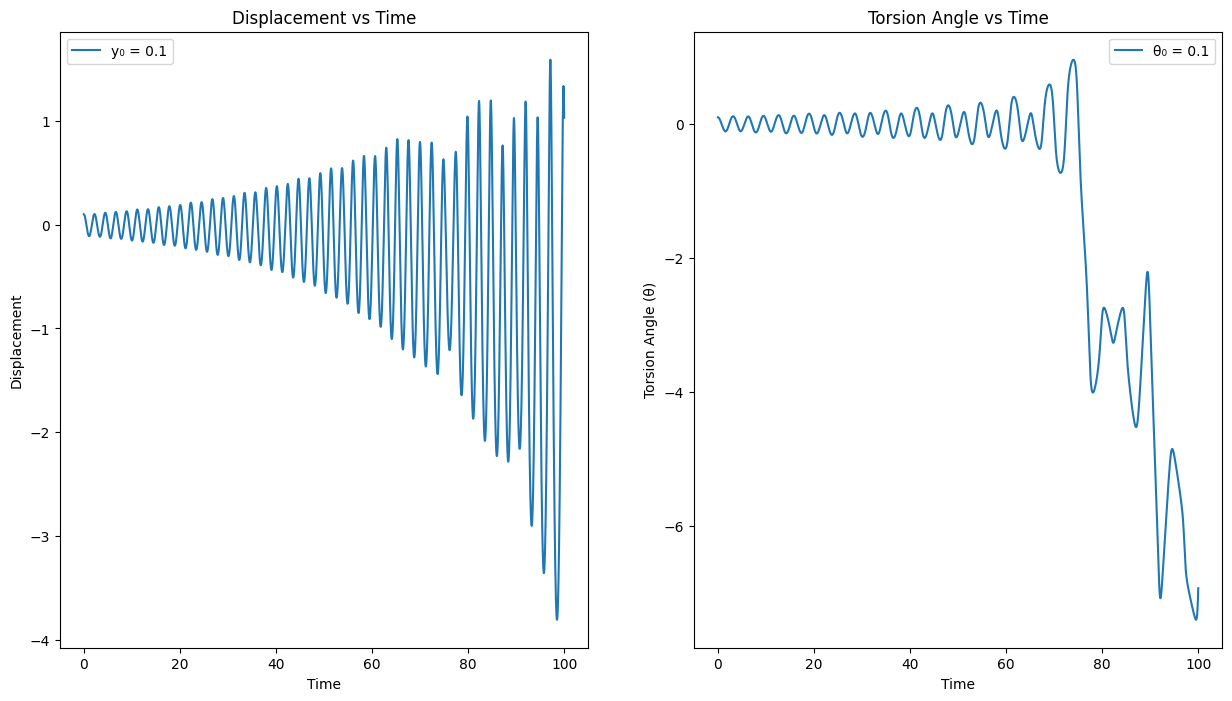

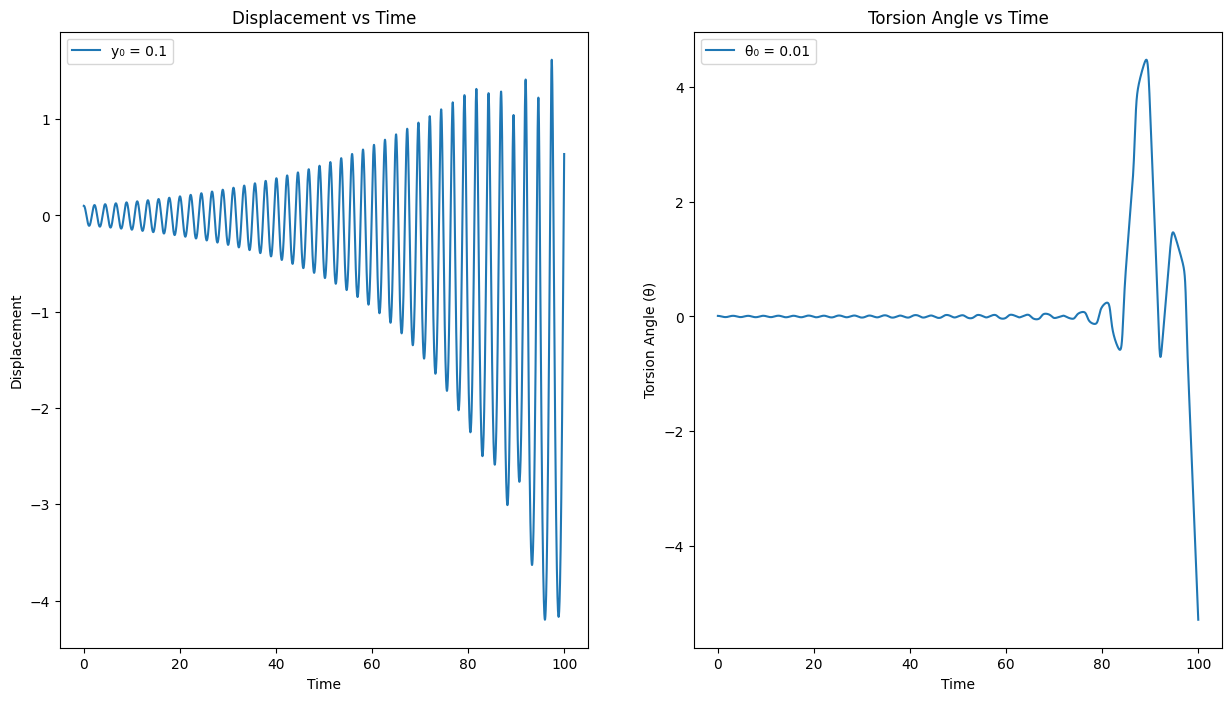

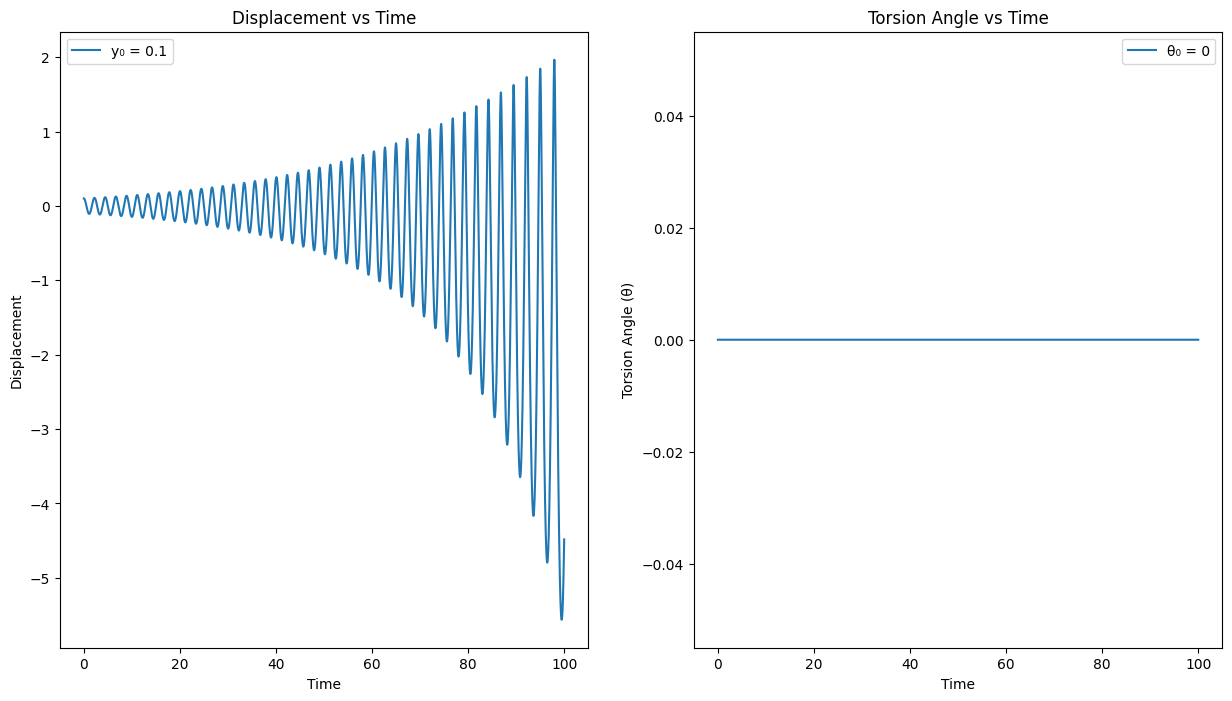

In [13]:
#defining a function for ploting the graphs 
def plot_nowind():

    #list of the initial torsion angles
    torsion_angles = [0.1, 0.01, 0]

    #loop for running the model for all values of initial torsion angle
    for theta0 in torsion_angles:
        times, theta, y, _, _ = tacoma_nowind(cromer=False,theta0=theta0, y0=0.1, ydash0=0, thetadash0=0, d=d, K=K, M=M, l=l, a=a)
    
        plt.figure(figsize=(15,8))

        #time graphs for vertical displacement 
        plt.subplot(1, 2, 1)
        plt.plot(times, y, label=f"y\u2080 = {0.1}")
        plt.xlabel("Time")
        plt.ylabel("Displacement")
        plt.title("Displacement vs Time")
        plt.legend()

        #time graphs for torsion angle
        plt.subplot(1, 2,2)
        plt.plot(times, theta, label=f"\u03B8\u2080 = {theta0}")
        plt.xlabel("Time")
        plt.ylabel("Torsion Angle (\u03B8)")
        plt.title("Torsion Angle vs Time")
        plt.legend()
        plt.show()

#calling the function
plot_nowind()

As seen in both methods and all comparison cases, the displacement and torsion angle exhibit oscillatory behaviour, gradually decaying over time. But as the torsion angle goes from 0 to 0.1, the damping present in the system increases, leading to energy dissipation over time. The oscillations change periodically over time but a general pattern is observed. 

For $\theta_0(t=0) = 0.1$ the oscillations decrease in amplitude but maintain their general frequency pattern. But for $\theta_0(t=0) = 0.01$ Similar oscillatory behaviour is observed, but the amplitudes of the oscillations are significantly smaller than in the case with $\theta_0(t=0) = 0.1$. When no initial torsion angle is applied, the system remains at equilibrium

### Solving the Differential Equation with wind force

For this part the Model was modified a bit. A wind force was introduced which causes a vertical acceleration which is given below:

$$ a_{wind}(t) = \frac{F(t)}{M} = A_{wind} \sin( \omega t ) $$

where $A_{wind}$ is the amplitude of the acceleration, where $A_{wind}=1,2$, and $\omega$ is the force's period. For $\omega=3$, time evolution for both $A_{wind}=1$ and $A_{wind}=2$ was plotted


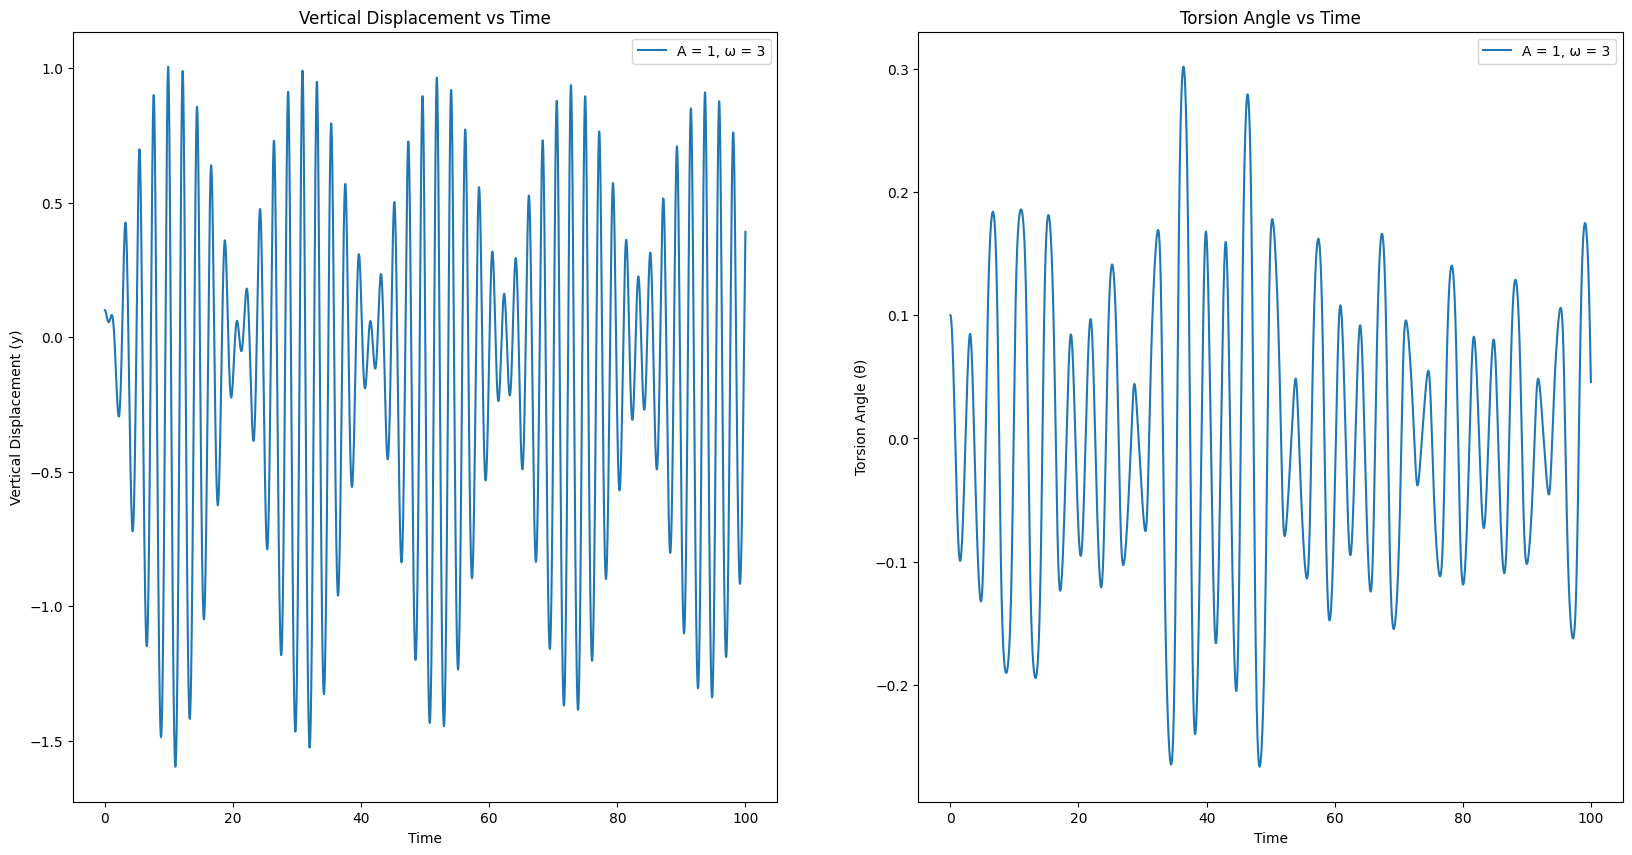

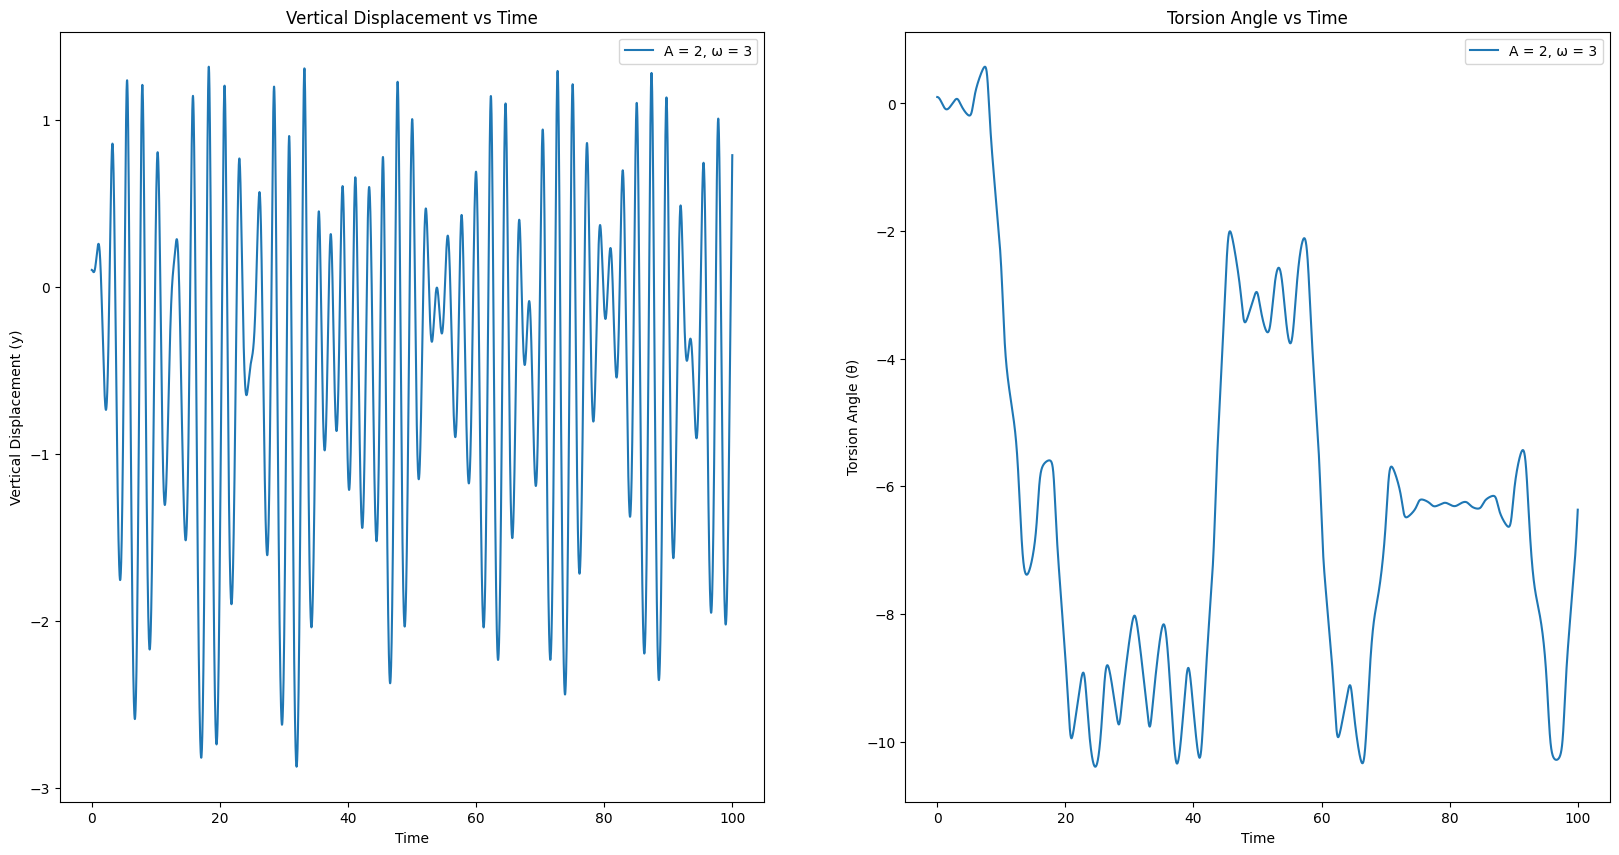

In [14]:
#function for defining the model
def tacoma(dt=0.01, cromer=True, t_final=100, y0=0.1, theta0=0.1, ydash0=0, thetadash0=0, d=0.1, K=1, M=1, l=1, a=1, A=1, w= 3):
    
    times=np.arange(t_initial, t_final+dt, dt) #array of model times
   
    Nt=len(times) #number of time-steps
    
    #empty variables to store the results created according to the number of time-steps
    y = np.zeros(Nt)
    theta = np.zeros(Nt)
    thetadash = np.zeros(Nt)
    ydash = np.zeros(Nt)
    
    #initial conditions
    y[0] = y0
    ydash[0] = ydash0
    theta[0] = theta0
    thetadash[0]=thetadash0
    
    #loop over all of the time-steps and integrate the equations simultaniously
    for n in range(Nt-1):
        
        #vertical acceleration due to wind
        wind_acce = A *np.sin(w * times[n])

        #angular acceleration equation
        theta2dash=-d * thetadash[n] + (3 * np.cos(theta[n])) * (K / (M*l*a))*((np.exp(a * (y[n] - 1 * np.sin(theta[n])))) - (np.exp(a * (y[n] + 1 * np.sin(theta[n])))))
        
        #vertical acceleration equation
        y2dash=-d * ydash[n] - (K / (M * a)) * ((np.exp(a * (y[n] - 1 * np.sin(theta[n])))) - 1 + (np.exp(a * (y[n] + 1 * np.sin(theta[n])))) - 1)+wind_acce
        
        #Taylor's method for time-steping vertical and angular velocities
        ydash[n+1]=ydash[n] + dt * y2dash
        thetadash[n+1]=thetadash[n] + dt * theta2dash
        
        #time-step the angle and vertical displacement.
        if cromer: #if we are using 'Taylor' or 'Cromer"
            y[n+1] = y[n] + dt * ydash[n+1]
            theta[n+1] = theta[n] + dt * thetadash[n+1]
        else:
            y[n+1] = y[n] + dt * ydash[n]
            theta[n+1] = theta[n] + dt * thetadash[n]
        
    #return the values of no of time-steps used, angle, vertical displacement, vertical and angular velocities
    return times, theta, y, ydash, thetadash

#defining a function for ploting the graphs 
def plot_amp(amp, w_s):
    
    #loop for considering all values of amplitude
    for A in amp:

        #loop for considering all values of omega
        for w in w_s:
            times, theta,y,  _, _ = tacoma(A=A, w=w, y0=0.1, theta0=0.1, d=d, K=K, M=M, l=l, a=a)
            plt.figure(figsize=(20, 10))
            
            # Plot y(t)
            plt.subplot(1, 2, 1)
            plt.plot(times, y, label=f"A = {A}, \u03C9 = {w}")
            plt.xlabel("Time")
            plt.ylabel("Vertical Displacement (y)")
            plt.title("Vertical Displacement vs Time")
            plt.legend()
            
            # Plot theta(t)
            plt.subplot(1, 2,2)
            plt.plot(times, theta, label=f"A = {A}, \u03C9 = {w}")
            plt.xlabel("Time")
            plt.ylabel("Torsion Angle (\u03B8)")
            plt.title("Torsion Angle vs Time")
            plt.legend()
            plt.show()

#calling the function for ploting 
plot_amp(amp=[1,2],w_s=[3])

As observed above in the graphs, as the amplitude of the wind force $(A)$ increases, the system's oscillations become more pronounced. The vertical displacement scales with the force amplitude. The torsion angle's response also becomes less predictable and more erratic at higher amplitudes, suggesting potential resonance or nonlinear effects. This highlighted the sensitivity of the system to external driving forces, with higher forces inducing stronger and less stable dynamics.

Similarly as done before, for $A_{wind}=2$, calculation were performed for slightly slower and faster wind force frequencies, namely, $\omega = 2, 2.5, 2.8, 3.3$. After that three graphs were nade to represent vertical displacement vs time for different frequencies, torsion angle vs time for different frequencies and a 3d map for showing the dependence of torsion angle on time and frequency

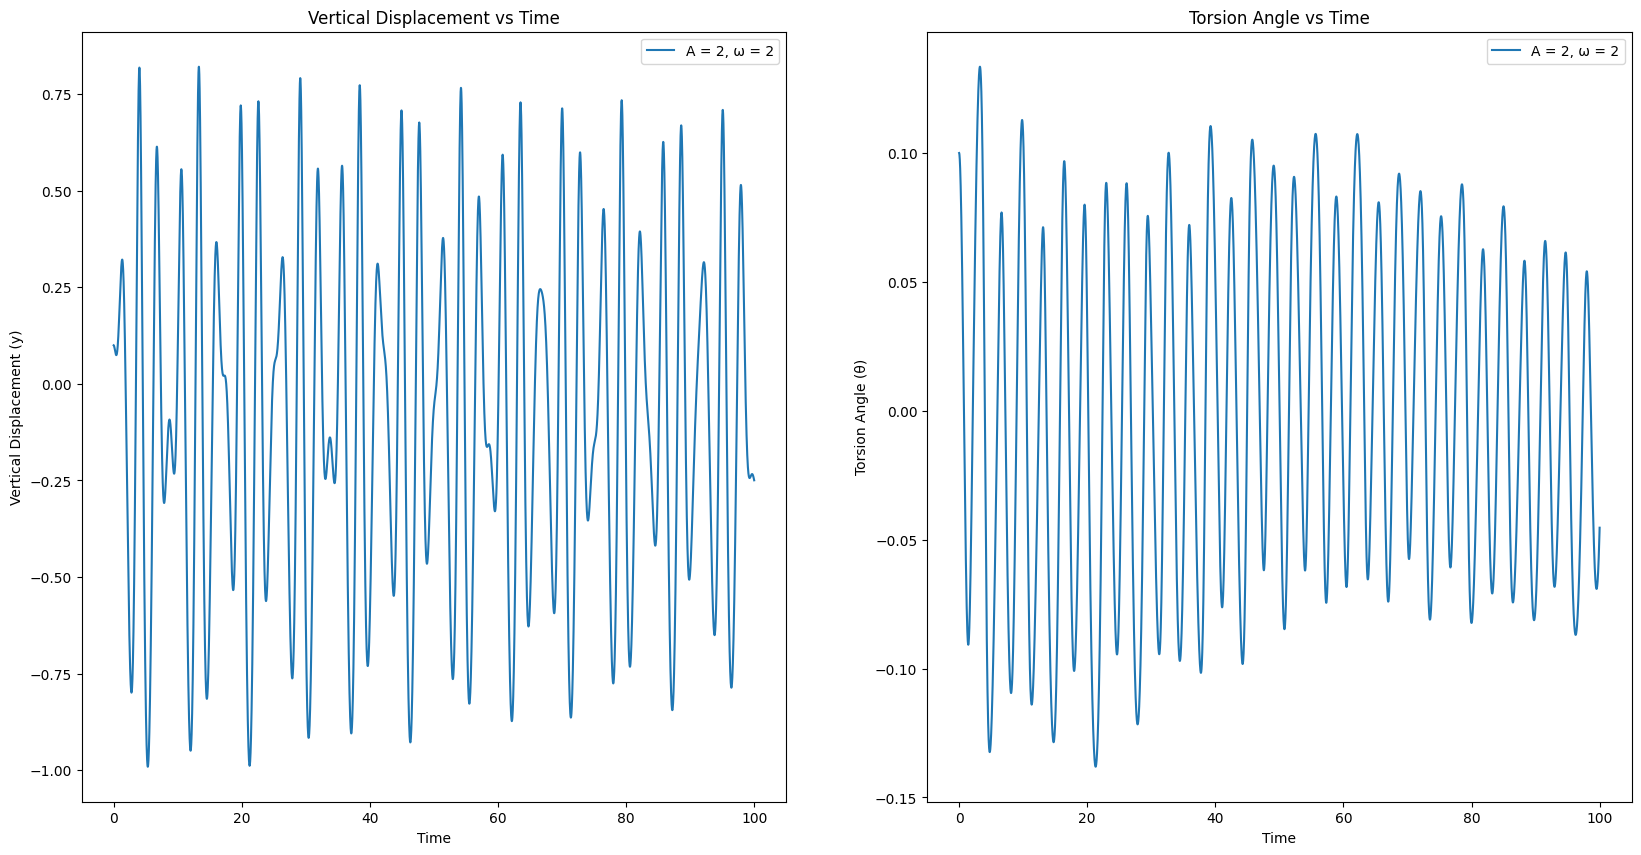

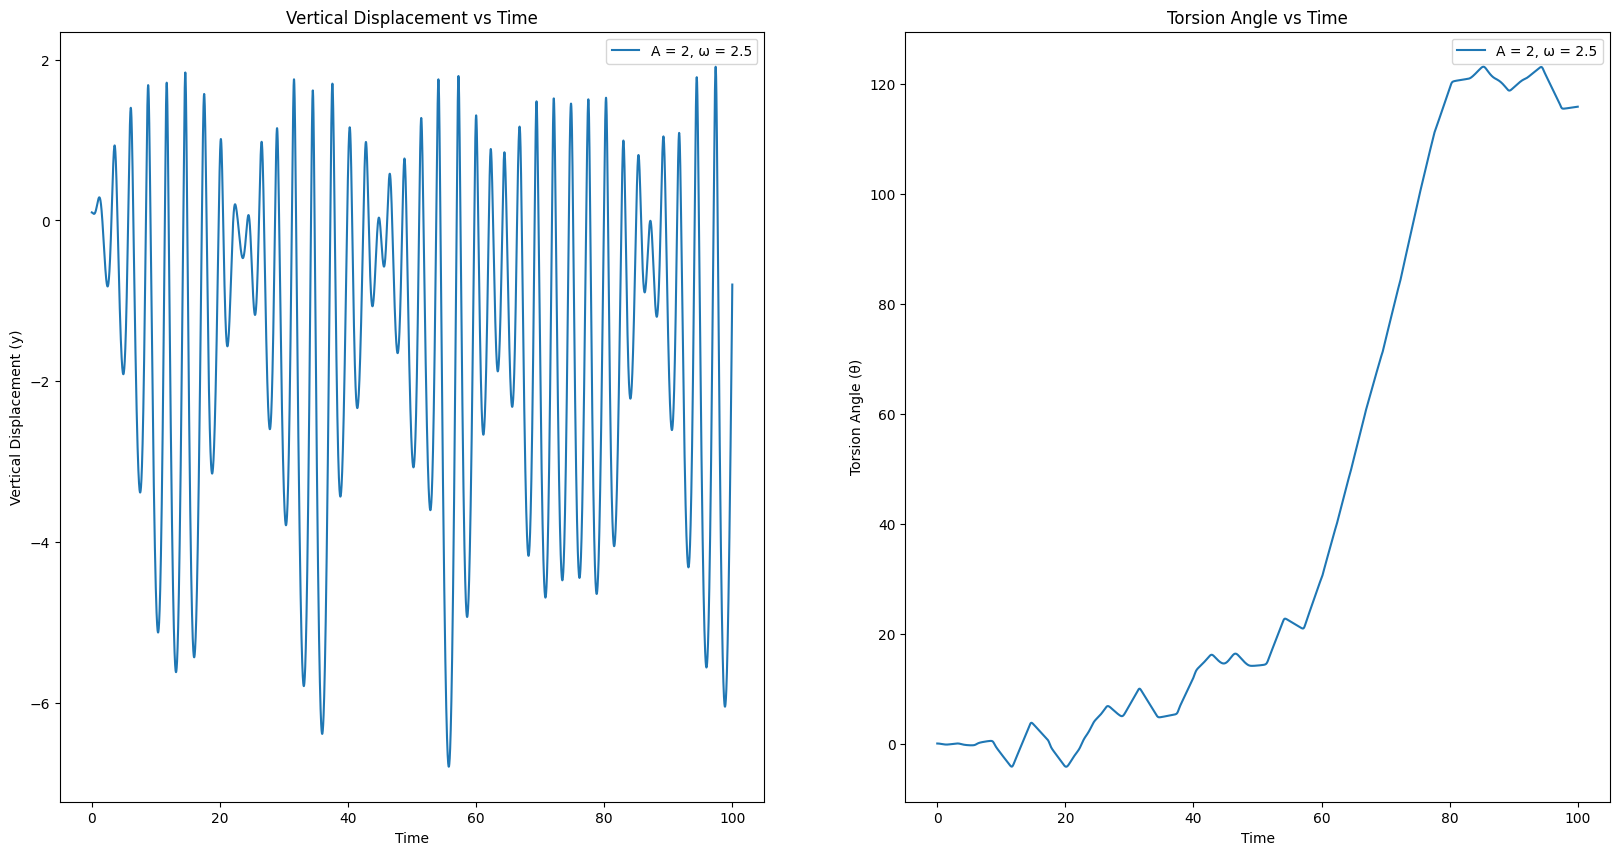

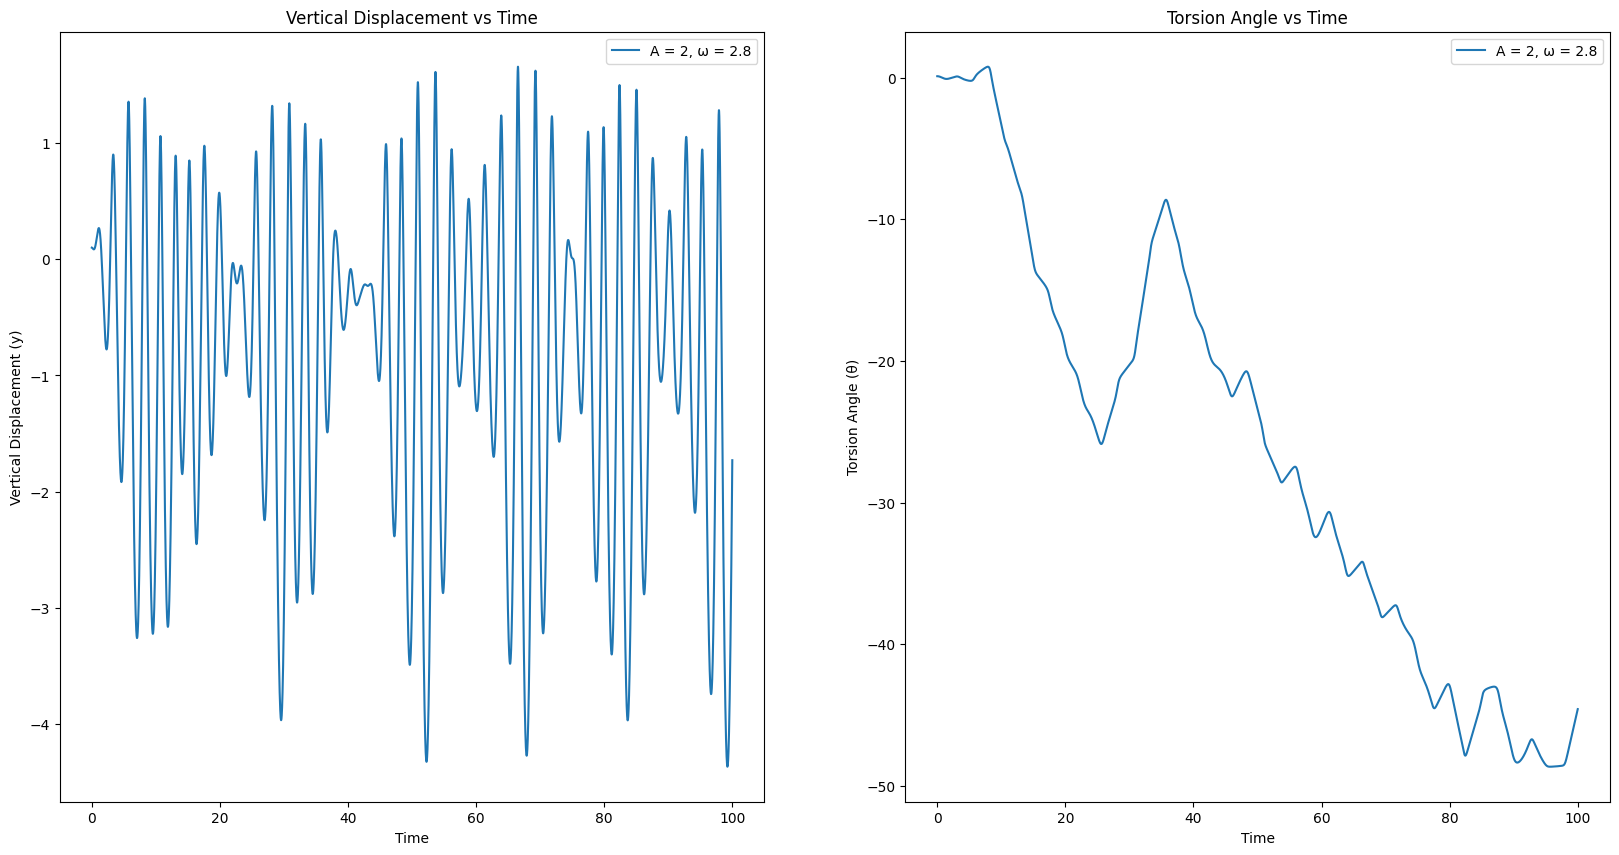

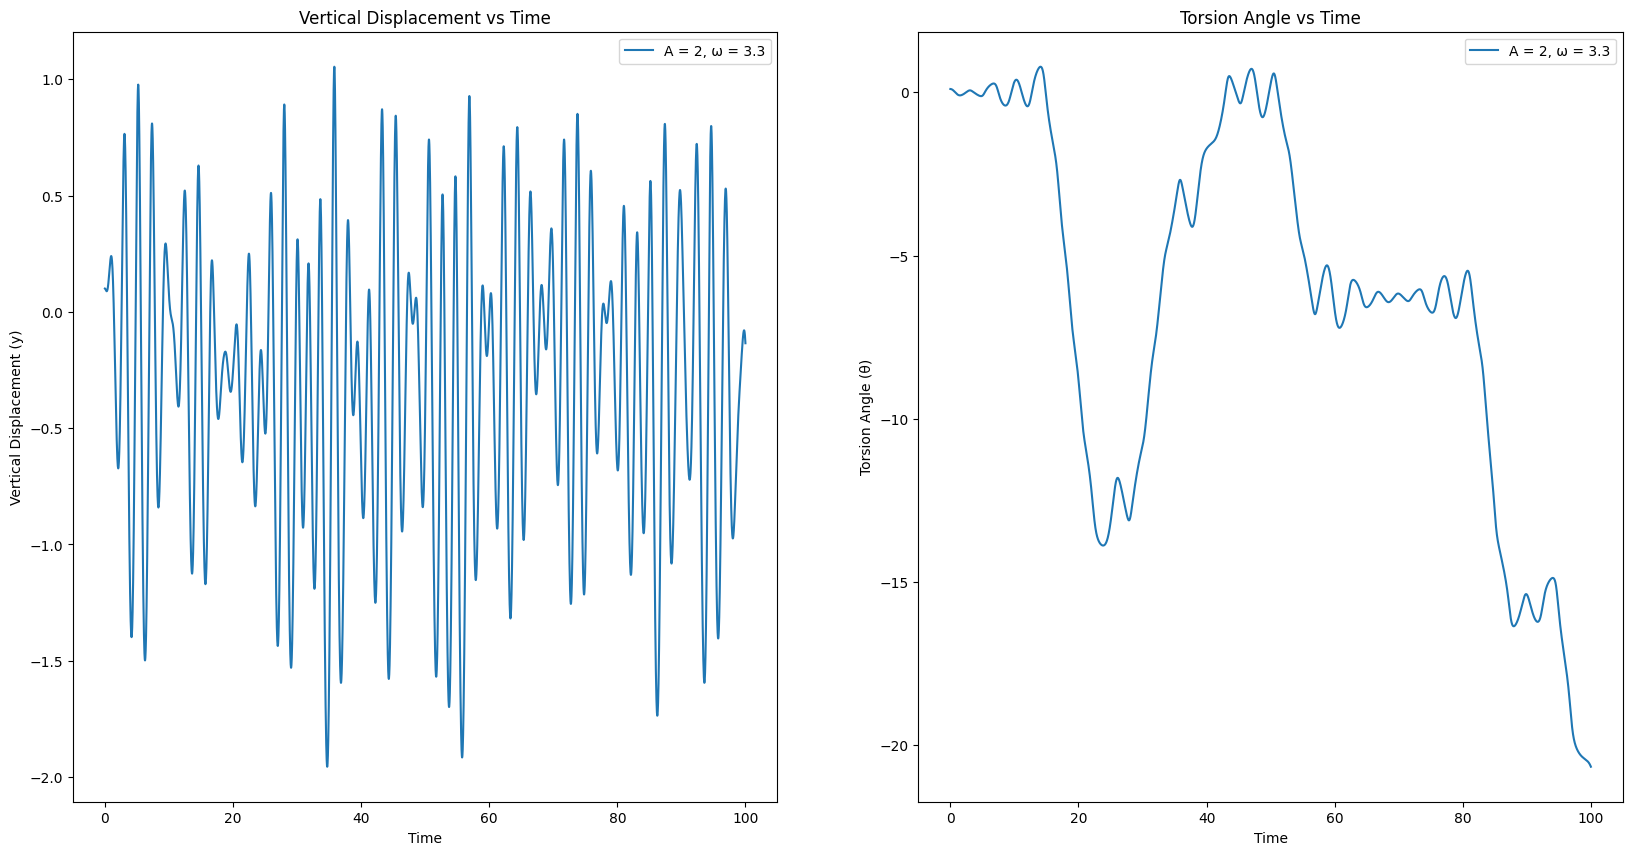

<Figure size 1200x800 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Torsion Angle (θ)')

Text(0.5, 1.0, 'Torsion Angle vs Time for Different ω')

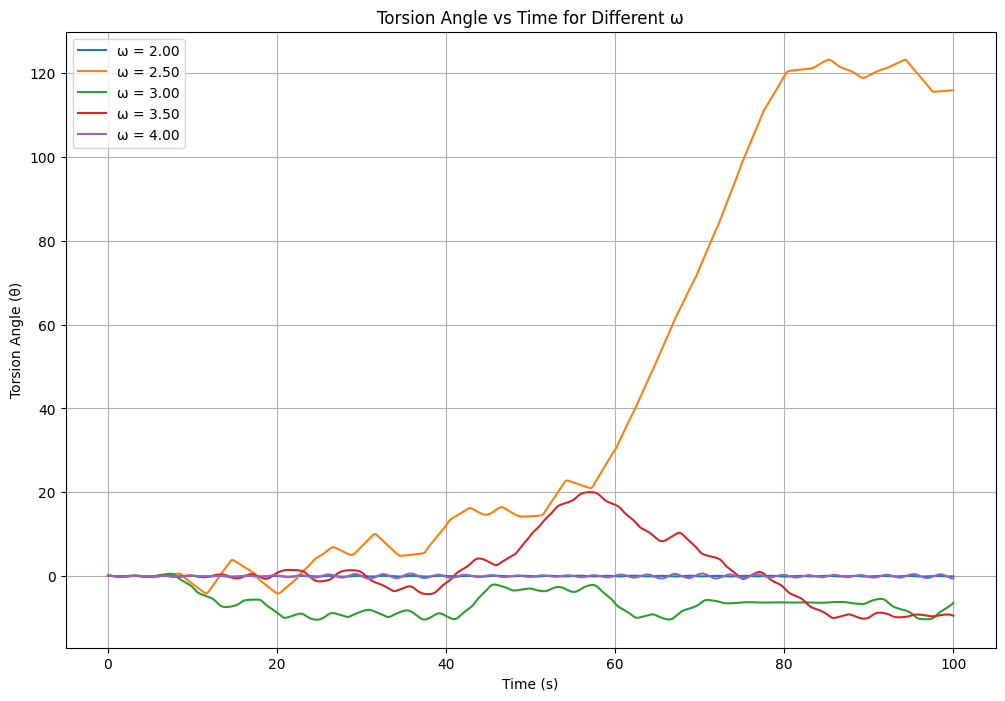

<Figure size 1200x800 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'displacement (m)')

Text(0.5, 1.0, 'displacement vs Time for Different ω')

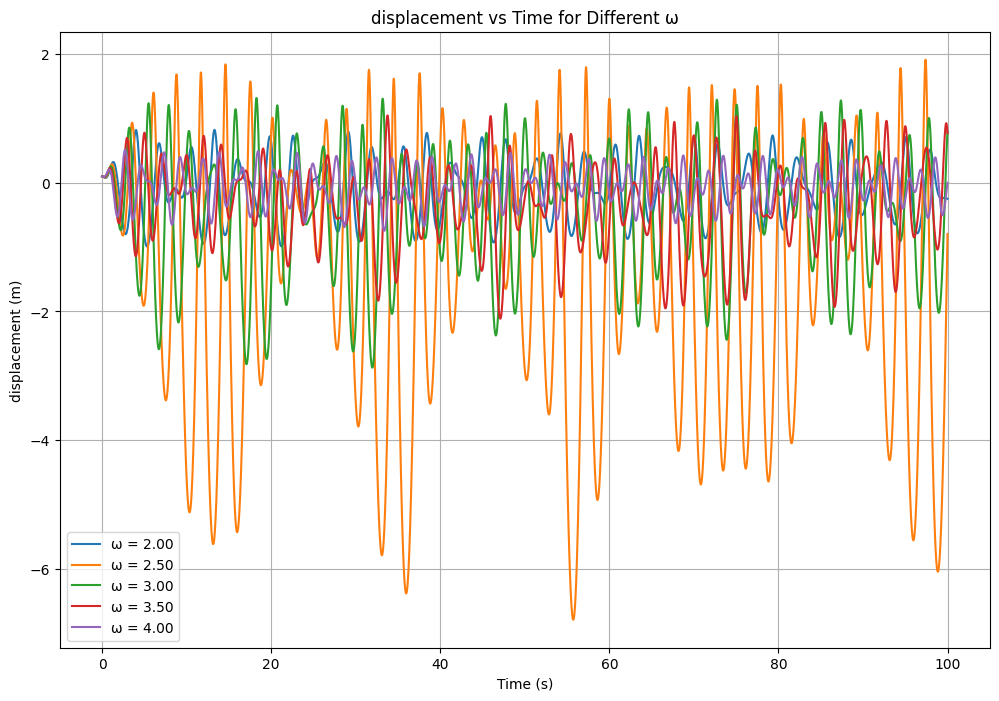

Text(0.5, 0, 'Time (s)')

Text(0.5, 0.5, 'ω')

Text(0.5, 0, 'Torsion Angle (θ)')

Text(0.5, 0.92, '3D Chart: Torsion Angle Dependence on Time and ω')

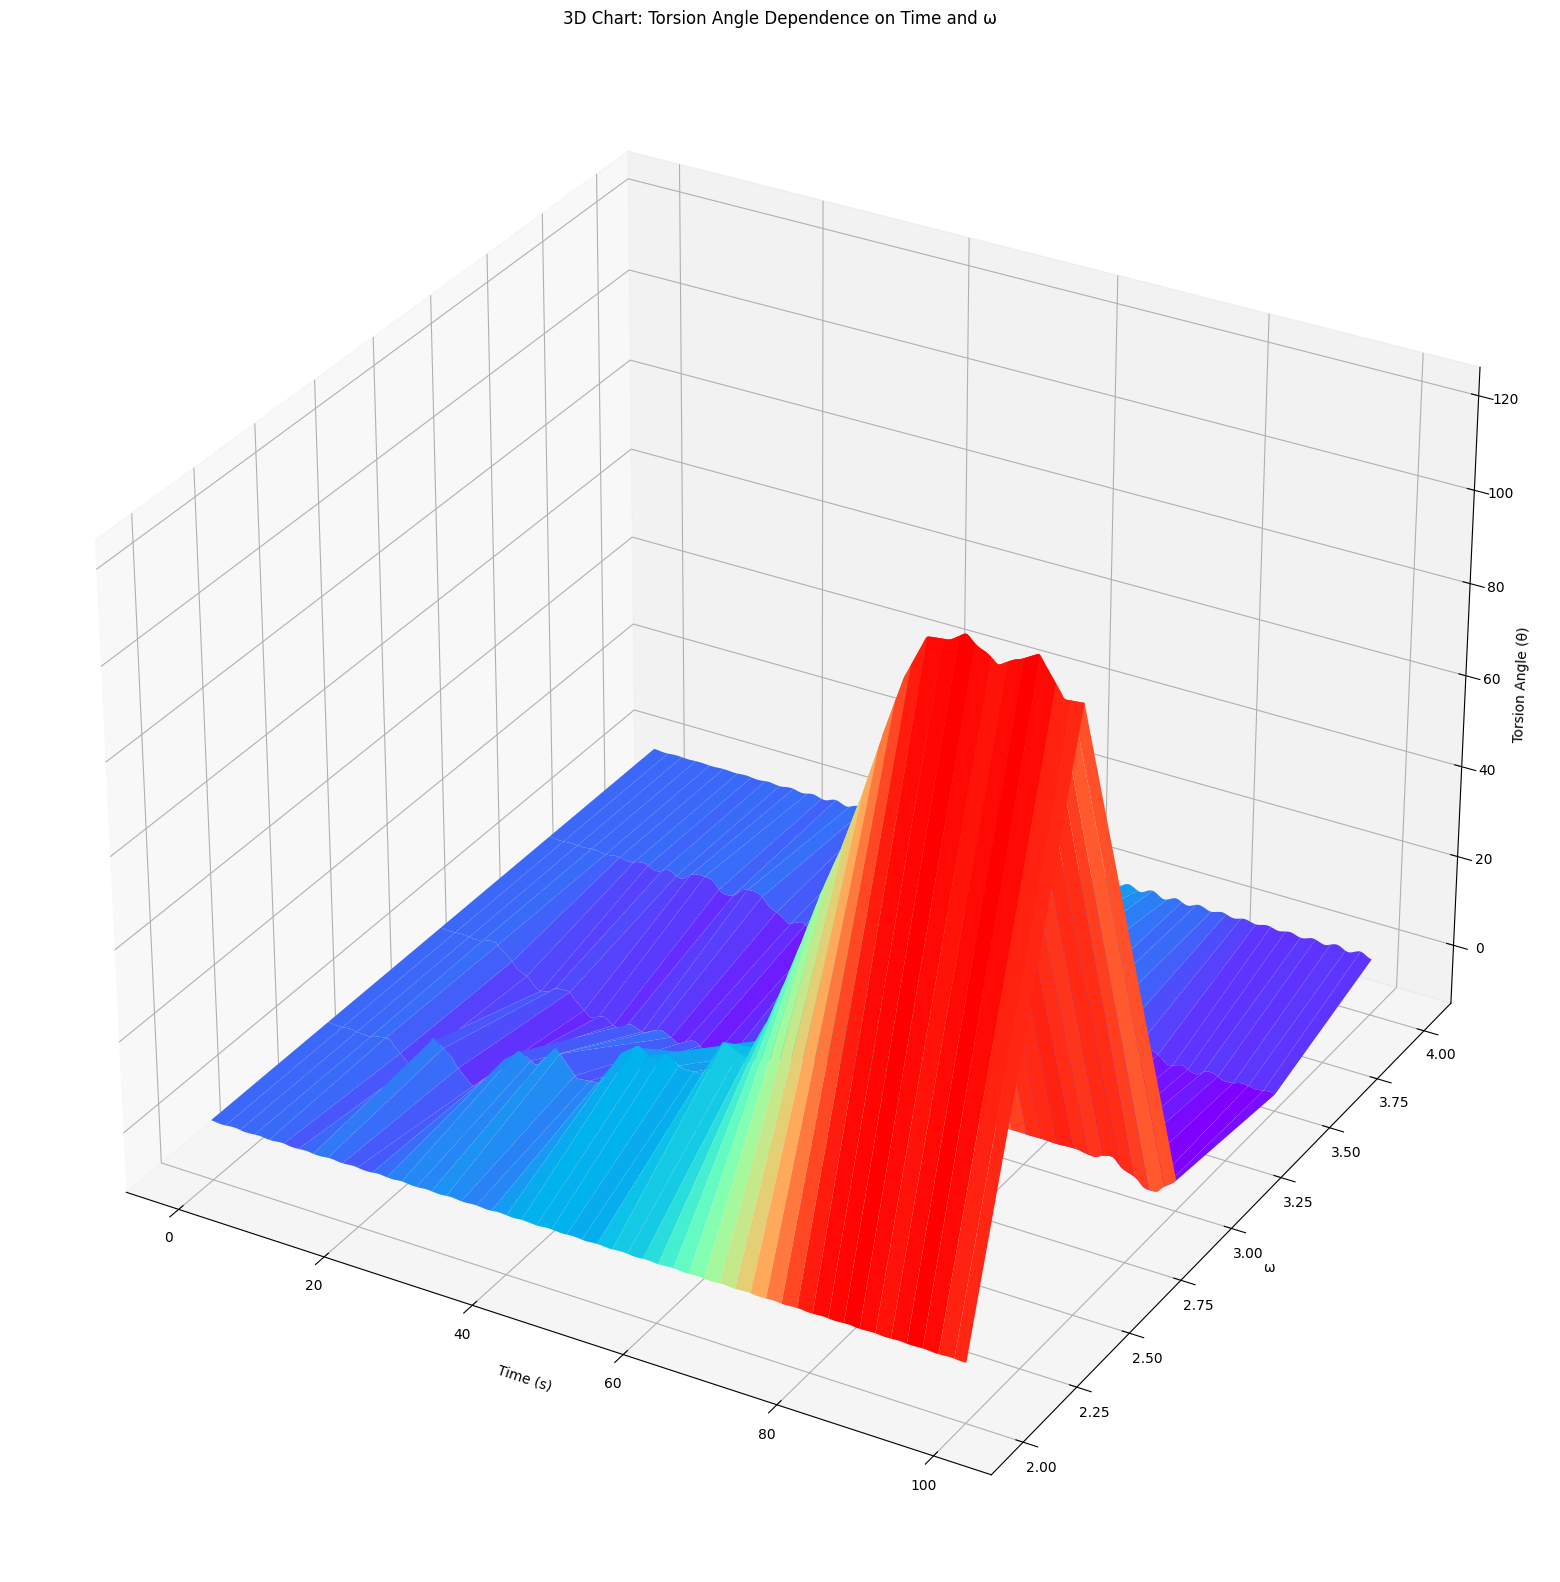

In [15]:
#calling the function for ploting
plot_amp(amp=[2],w_s=[2, 2.5, 2.8, 3.3])

#list of the frequencies to be used
w_s=np.linspace(2,4,5)

#size of the plot
plt.figure(figsize=(12, 8))

#loop for considering all values of omega
for w in w_s:
    times, theta, y, _, _ = tacoma(A=2, w=w, y0=0.1, theta0=0.1, d=d, K=K, M=M, l=l, a=a)
    plt.plot(times, theta, label=f"ω = {w:.2f}")

# Plot theta(t)
plt.xlabel("Time (s)")
plt.ylabel("Torsion Angle (θ)")
plt.title("Torsion Angle vs Time for Different ω")
plt.legend()
plt.grid(True)
plt.show()

#size of the plot
plt.figure(figsize=(12, 8))

#loop for considering all values of omega
for w in w_s:
    times, theta, y, _, _ = tacoma(A=2, w=w, y0=0.1, theta0=0.1, d=d, K=K, M=M, l=l, a=a)
    plt.plot(times, y, label=f"ω = {w:.2f}")

# Plot y(t)
plt.xlabel("Time (s)")
plt.ylabel("displacement (m)")
plt.title("displacement vs Time for Different ω")
plt.legend()
plt.grid(True)
plt.show()

#module to be used for 3d plot
from mpl_toolkits.mplot3d import Axes3D

#list for time steps
time_values = np.arange(0, t_final + dt, dt)

#empty list for storing theta values
theta_values = []

#loop for considering all values of omega
for w in w_s:
    times, theta, y, _, _ = tacoma(A=2, w=w, y0=0.1, theta0=0.1, d=d, K=K, M=M, l=l, a=a, t_final=t_final)
    theta_values.append(theta)

theta_values = np.array(theta_values)

# Create 3D meshgrid for time and omegas
time_mesh, omega_mesh = np.meshgrid(time_values, w_s)

# Plotting the 3D chart
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(time_mesh, omega_mesh, theta_values, cmap="rainbow")
ax.set_xlabel("Time (s)")
ax.set_ylabel("ω")
ax.set_zlabel("Torsion Angle (θ)")
ax.set_title("3D Chart: Torsion Angle Dependence on Time and ω")
plt.show()


As seen above, the system exhibits resonance near $\omega = 2.5$, with amplified vertical displacement and torsion angle. Frequencies beyond the resonant point $(\omega > 2.5)$ lead to irregular or chaotic dynamics, with the system struggling to stabilize. The interplay between driving frequency and time significantly influences the stability and behaviour of the torsion angle.

### Time Trajectories

To better understand the behaviour of vertical displacement and torsion angle, a graph was plotted to represent $\theta(t)$ as a function of $y(t)$

<Figure size 2000x1000 with 0 Axes>

Text(0.5, 0, 'Displacement y(t)')

Text(0, 0.5, 'Torsion Angle θ(t)')

Text(0.5, 1.0, 'y(t) and θ(t)')

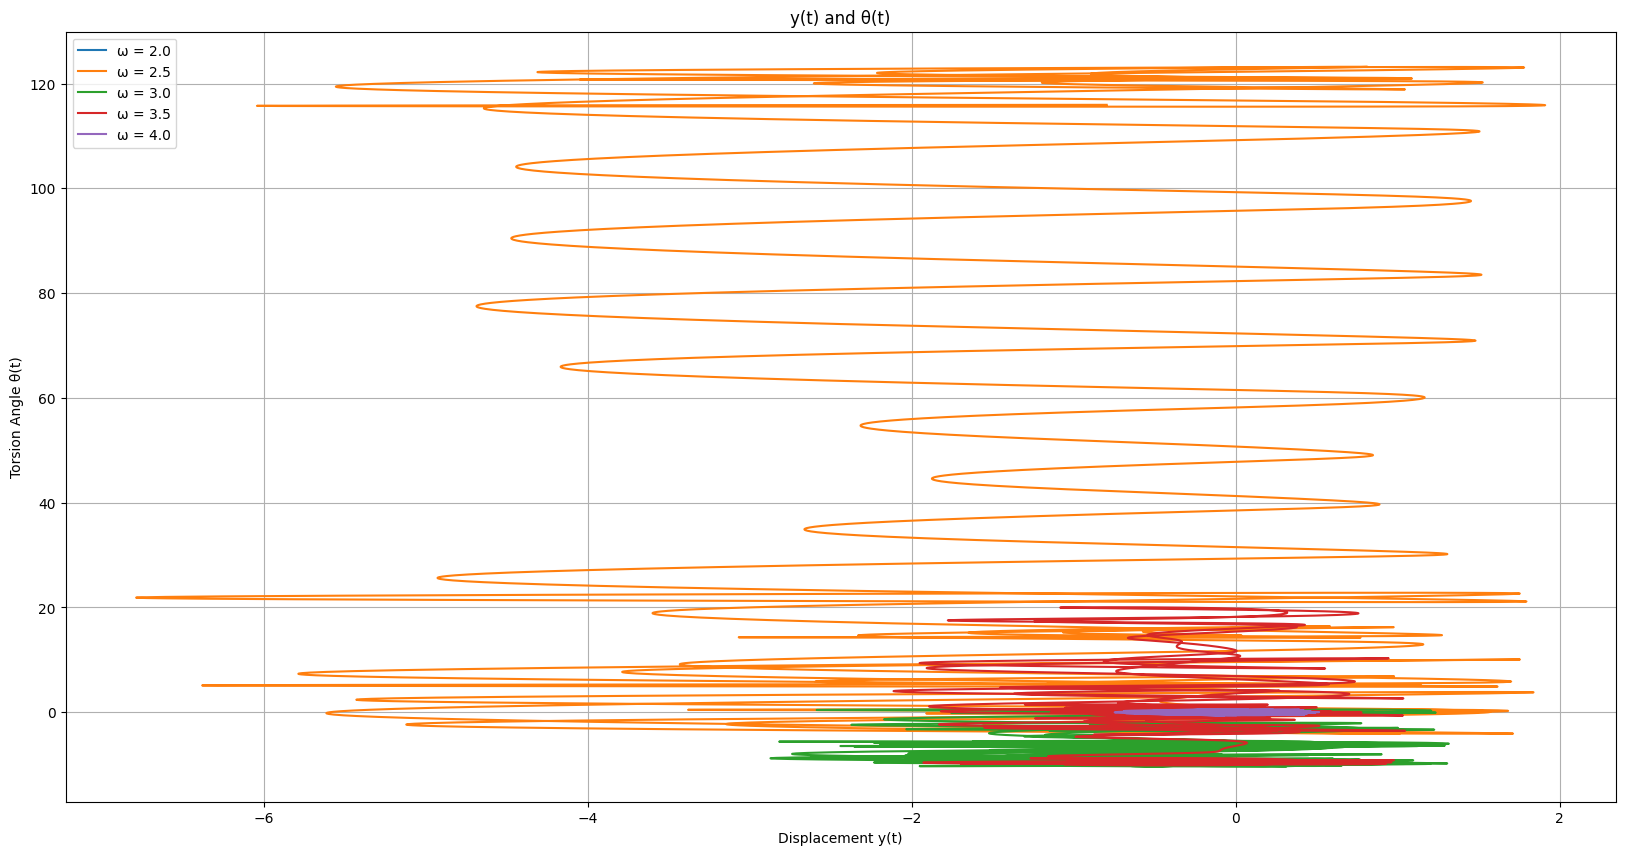

In [16]:
#plot size
plt.figure(figsize=(20, 10))

#array of omegas to be used
w_s=np.linspace(2, 4, 5)

#loop for considering all values of omega
for w in w_s:
    _,theta, y,_,_ = tacoma(y0=0.1, theta0=0.1, d=d, K=K, M=M, l=l, A=2,w=w)
    plt.plot(y, theta, label=f"\u03C9 = {w}")

#plot for theta vs y
plt.xlabel("Displacement y(t)")
plt.ylabel("Torsion Angle θ(t)")
plt.title("y(t) and θ(t)")
plt.legend()
plt.grid()
plt.show()

The key observations in this part were, as $\omega$ increases, the system transitions from stable, periodic motion $(\omega = 2.0)$ to resonance $(\omega = 2.5)$, followed by irregular and potentially chaotic behaviour at higher frequencies $(\omega \geq 3.0)$. These observations aligned with the ones obtained in the above parts. Another observation was, the torsion angle's dependence on vertical displacement becomes increasingly nonlinear and unpredictable with increasing $\omega$, reflecting the system's sensitivity to external driving forces.

### Discussion

The observations revealed that, without wind force, the system exhibited damped oscillatory behavior in vertical displacement and torsion angle, with amplitudes decaying over time depending on initial conditions. Larger initial torsion angles produced greater oscillation amplitudes, while no initial torsion angle kept the system at equilibrium.

With wind force applied, resonance effects were observed at $\omega=2.5$, leading to significant amplification of displacement and torsion angle, causing instability. Beyond resonance, the system transitioned into irregular and chaotic behavior, with erratic oscillations and broader phase-space trajectories at higher frequencies.

Phase-space analysis showed stable and periodic motion with compact, symmetric trajectories at $\omega=2.0$. At resonance $(\omega = 2.5)$, elongated trajectories indicated instability, while higher frequencies $(\omega \geq 3.0)$ resulted in irregular, expanded trajectories, highlighting chaotic dynamics. These findings demonstrated the system’s sensitivity to driving frequency and external forces, with resonance and nonlinear effects dominating its behavior.\

The Tacoma Bridge is best understood as a system of coupled oscillators, with different sections of the bridge interacting through shared suspension cables, rather than functioning as independent components. Extending the current model to represent the entire bridge would involve treating each section as an oscillator governed by similar differential equations, with coupling terms added to account for the physical connections between adjacent sections. These coupling terms would reflect the tension, stiffness, and damping of the suspension cables, as well as the structural properties of the bridge. Solving this expanded system would allow for the analysis of how oscillations in one section influence and amplify those in others, potentially leading to synchronized or resonant behavior across the entire structure.

Other systems with similar behavior, involving resonance or chaotic dynamics, include wind-induced oscillations in power lines, vibrations in airplane wings, and the motion of tall buildings subjected to periodic forces such as wind or seismic activity. Resonance in these systems can lead to catastrophic outcomes similar to the Tacoma Bridge collapse, while chaotic behavior can emerge in systems dominated by nonlinear interactions.

To avoid the occurrence of resonance in this system of coupled differential equations, additional damping mechanisms could be introduced to dissipate energy effectively. Modifying the natural frequencies of individual sections, such as by adjusting the stiffness of the cables or the mass distribution of the bridge, would prevent alignment with external driving frequencies. Active control systems could also be incorporated to counteract oscillations in real-time, reducing the risk of resonance or chaotic dynamics and ensuring structural stability.

## Conclusion

The combined studies of the Tacoma Narrows Bridge and the Traveling Salesman Problem (TSP) showcased the effectiveness of computational and optimization techniques in addressing real-world challenges. The Tacoma simulation successfully modeled the dynamic behavior of coupled oscillators representing sections of the bridge, revealing key factors such as resonance and damping. It was observed that increasing the initial torsion angle resulted in greater amplitude oscillations, while external forces like wind induced chaotic behaviors at certain frequencies. These findings highlighted the importance of managing system parameters to prevent resonance and maintain stability in large structures.

For the TSP, simulated annealing was implemented to optimize the shortest path for datasets ranging from 8 to 30 cities. The algorithm effectively minimized distances, with results varying from approximately 2100 to 2300 units for 30 cities. The cooling schedule and randomness in initial paths were found to be crucial in balancing exploration and exploitation, ensuring convergence toward near-optimal solutions. Furthermore, adjustments such as penalty functions were proposed to address practical constraints, such as avoiding routes through snow-prone states during winter.

In conclusion, the Tacoma and TSP studies demonstrated the applicability of computational modeling and optimization techniques to diverse problems in structural dynamics and logistics. The Tacoma analysis provided valuable insights into the behavior of oscillatory systems under varying conditions, while the TSP optimization validated the robustness of simulated annealing in solving complex combinatorial problems. These methods offer significant potential for addressing challenges in engineering, transportation, and beyond, reinforcing their utility in scientific and industrial applications.

## References

[1] : Billah, K. Y., & Scanlan, R. H. (1991). Resonance, Tacoma Narrows Bridge Failure, and Undergraduate Physics Textbooks. American Journal of Physics, 59(2), 118-124.

[2] : Kirkpatrick, S., Gelatt, C. D., & Vecchi, M. P. (1983). Optimization by Simulated Annealing. Science, 220(4598), 671-680.

[3] : Cerny, V. (1985). Thermodynamical Approach to the Traveling Salesman Problem: An Efficient Simulation Algorithm. Journal of Optimization Theory and Applications, 45, 41-51.

[4] : Strogatz, S. H. (2000). Nonlinear Dynamics and Chaos: With Applications to Physics, Biology, Chemistry, and Engineering. Westview Press.

---